<img src="110m_cultural/hi.png" width="300px">


## **Predicting Health Insurance**
#### **Goal:** The main goal of the project is to create a machine learning model to predict if a customer has or not a health insurance.

Introduction to data Science Project by Group T:
- Adriano Chessa (201405297)
- Ana Pinto (202105085)
- Pedro Leitão (202107852)

#### Business Understanding
- Objective: The primary goal is to build a machine learning model that predicts whether a customer has health insurance or not​

- Business Problem: Organizations need to identify factors influencing the adoption of health insurance and predict the likelihood of customers purchasing it. This can help in targeted marketing strategies or customer engagement initiatives.
- Deliverables: A predictive model and insights into customer demographics, income, and other influencing factors.

Table of Contents:
- [**Part 1:** Pre-Processing](#part1)<br><br>


- [**Part 2:** Dataset statistics and visualization - Data Understanding](#part2)
- [- Part 2.1: Are they young, middle-aged, or seniors?](#part2.1)
- [- Part 2.2: How affluent are they?](#part2.2)
- [- Part 2.3: Where do they live?](#part2.3)
- [- Part 2.4: Do you see differences in the income related to age, gender or the marital situation?](#part2.4)
- [- Part 2.5: Are the characteristics of the housing situation interrelated?](#part2.5)
- [- Part 2.6: What is the relation between age and income?](#part2.6)
- [- Part 2.7: Visualize the probability of health insurance by age?](#part2.7)
- [- Part 2.8: Visualize the marital status according to the housing type?](#part2.8)
- [- Part 2.9: How the health insurance distributes according to the marital status?](#part2.9)<br><br>


- [**Part 3:** Dataset optimization for each model & Correlation matrices](#part3)
- [- Part 3.1: Standardization and one hot encoding](#part3.1)
- [- Part 3.2: Correlation matrices](#part3.2)<br><br>

- [**Part 4:** Feature Selection](#part4)
- [- Part 4.1: Feature Selection using KBest](#part4.1)
- [- Part 4.2: Feature Selection using Random Forest](#part4.2)
- [- Part 4.3: Feature Selection using RFE](#part4.3)
- [- Part 4.4: SMOTE](#part4.4)

- [**Part 5**: Model Training](#part5)
- [- Part 5.1: KNN](#part5.1)
- [- Part 5.2: Naive Bayes](#part5.2)
- [- Part 5.3: Decision Tree](#part5.3)
- [- Part 5.4: Random Forest](#part5.4)
- [- Part 5.5: XGBoost](#part5.5)
- [- Part 5.6: SVM](#part5.6)
- [- Part 5.7: Neural Network](#part5.7)
- [- Part 5.8: Meta-model](#part5.8)

- [**Part 6**: Test Kaggle](#part6)

- [**Part 7**: Conclusions and Aggregation Table](#part7)

## Part 0 library and data importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score
)
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, RFE
from sklearn.dummy import DummyClassifier
from tensorflow.keras.models import load_model
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.model_selection import LearningCurve
from joblib import parallel_backend, Parallel, delayed
import pickle
from tensorflow.keras import layers, models, callbacks, optimizers, losses, metrics
from tensorflow.keras.callbacks import Callback
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#path to file
customer_df= pd.read_csv('customer.csv')

In [3]:
print(f'Shape: {customer_df.shape}\n')
print(f'{customer_df.columns}\n')
customer_df.head(3)

Shape: (72458, 15)

Index(['Unnamed: 0', 'custid', 'sex', 'is_employed', 'income',
       'marital_status', 'health_ins', 'housing_type', 'num_vehicles', 'age',
       'state_of_res', 'code_column', 'gas_usage', 'rooms', 'recent_move_b'],
      dtype='object')



Unnamed: 0        custid     sex is_employed   income      marital_status  \
0           7  000006646_03    Male        True  22000.0       Never married   
1           8  000007827_01  Female         NaN  23200.0  Divorced/Separated   
2           9  000008359_04  Female        True  21000.0       Never married   

   health_ins                  housing_type  num_vehicles  age state_of_res  \
0        True      Homeowner free and clear           0.0   24      Alabama   
1        True                        Rented           0.0   82      Alabama   
2        True  Homeowner with mortgage/loan           2.0   31      Alabama   

   code_column  gas_usage  rooms recent_move_b  
0         1047      210.0      3             F  
1         1047        3.0      6             T  
2         1047       40.0      3             F

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


In [5]:
print(f'Is NaN: \n{customer_df.isna().sum()}')
print(f'Number of duplicates: {customer_df.duplicated().sum()}')
print(f'Number of duplicated ids: {customer_df.duplicated(subset= "custid").sum()}')

Is NaN: 
Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64
Number of duplicates: 0
Number of duplicated ids: 0


In [6]:
#skewness
skewness = round(customer_df.select_dtypes(include=['number']).skew(), 3)

#outliers
numeric_columns = customer_df.select_dtypes(include=['number'])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
for column in numeric_columns.columns:
    print(f"{column}:")
    print(f"Outliers: {outliers_count[column]}")
    print(f"Skewness: {skewness[column]}")
    print()

Unnamed: 0:
Outliers: 0
Skewness: 0.007

income:
Outliers: 4512
Skewness: 4.873

num_vehicles:
Outliers: 0
Skewness: 0.672

age:
Outliers: 191
Skewness: 0.376

code_column:
Outliers: 0
Skewness: 1.029

gas_usage:
Outliers: 4595
Skewness: 3.031

rooms:
Outliers: 0
Skewness: 0.006



### Summary of Observations:
- The Income and Gas Usage variables exhibit very high positive skewness values, suggesting that these variables have long tails with a few extreme values.
- Age and Num_Vehicles show relatively mild skewness, but age has notable outliers that should be examined further.


##  **Part 1**: Pre-Processing <a id="part1"></a>

- **Data Pre-Processing**: To clean, transform and rectify data types.
- **Summary of the Data**: To understand the data, checking for duplicates and missing values.

#### Column: 'Unnamed: 0'
- No description in dictionary
- Dtype is interger
- No missing values, but no additional information as id is already given by 'custid' which has no duplicates
#### Column: 'column_code'
- Also dropped as the same information is provided by 'state_of_res' just in a different format

In [7]:
customer_df[['Unnamed: 0', 'custid', 'code_column', 'state_of_res']].sample(3)

Unnamed: 0        custid  code_column  state_of_res
54722       75295  000236520_02         2997  Pennsylvania
60723       83395  000106826_02         6026         Texas
28928       39926  001301727_01          935      Kentucky

In [8]:
customer_df.drop(columns= ['Unnamed: 0', 'code_column'], inplace= True)

#### Column: 'is_employed'
- dtype is logical as per dictionary
- NaN refers to people not in workforce so it will be converted into False to keep the whole variable as Boolean

In [9]:
customer_df['is_employed'].unique()

array([True, nan, False], dtype=object)

In [10]:
customer_df['is_employed']= customer_df['is_employed'].fillna(False)

C:\Users\chess\AppData\Local\Temp\ipykernel_38716\2821843629.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_df['is_employed']= customer_df['is_employed'].fillna(False)


In [11]:
customer_df['is_employed']= customer_df['is_employed'].astype(bool)

#### Column: 'income'
- Negative values converted into 0
- data transformed with log transformation as it is highly skewed so it better fits the data distribution

In [12]:
customer_df['income'] = customer_df['income'].apply(lambda x: max(x, 0))
customer_df['log_income'] = np.log1p(customer_df['income'])

#computes ln⁡(1+𝑥)ln(1+x), which is safer for small or zero values of x since:ln
#(1+0)=0 while np.log(0) would result in a math error or -inf.

#### Column: 'marital_status', 'state_of_res', 'rooms', 'health_ins', 'Sex', 'housing_type'
- No action taken

#### Column: 'housing_type'
- dtype is string
- 1686 missing values no explanation given in dictionary

#### Column: 'recent_move_b'
- converted from object into boolean

In [13]:
customer_df['recent_move_b']= customer_df['recent_move_b'].replace({'F': False, 'T': True})
customer_df['recent_move_b']= customer_df['recent_move_b'].astype(bool)

#### Column: 'num_vehicles'
- converted from float to interger as we are talking about entire vehicles
- unsure what to do with missing values

In [14]:
customer_df['num_vehicles'].astype('Int64') # Int64 special integer type in pandas that supports NaN values

0           0
1           0
2           2
3           1
4           2
         ... 
72453       1
72454       1
72455       2
72456       1
72457    <NA>
Name: num_vehicles, Length: 72458, dtype: Int64

#### Column: 'gas_usage'
- After checking that all entries that had no value for gas usage were the same that had none for num_vehicles, it was possible to assume that no useful information came from these entries even when the dictionary claimed for gas_usage that 'NaN' could represent Not aplicable cases, therefore the best approcah was to drop the entries that represented only 2.33% of the total entries

In [15]:
customer_df_NAS= customer_df[customer_df['gas_usage'].isna()].copy()
customer_df_NAS.sample(5)

custid     sex  is_employed   income marital_status  health_ins  \
8513   000891894_01  Female        False   8800.0  Never married        True   
33084  001189096_01    Male        False      0.0  Never married        True   
2985   000654268_01    Male        False  10400.0        Widowed        True   
2369   001158946_01  Female        False  19200.0        Widowed        True   
53410  000141194_01  Female        False   4700.0        Married        True   

      housing_type  num_vehicles  age   state_of_res  gas_usage  rooms  \
8513           NaN           NaN   55     California        NaN      4   
33084          NaN           NaN   39  Massachusetts        NaN      5   
2985           NaN           NaN   53       Arkansas        NaN      3   
2369           NaN           NaN   85        Arizona        NaN      5   
53410          NaN           NaN   68         Oregon        NaN      6   

       recent_move_b  log_income  
8513            True    9.082621  
33084           True    0.000000  
2985            True    9.249657  
2369            True    9.862718  
53410           True    8.455531

In [16]:
customer_df.isna().sum()

custid               0
sex                  0
is_employed          0
income               0
marital_status       0
health_ins           0
housing_type      1686
num_vehicles      1686
age                  0
state_of_res         0
gas_usage         1686
rooms                0
recent_move_b        0
log_income           0
dtype: int64

In [17]:
customer_df.dropna(subset=['gas_usage'], inplace=True)

#### Column: 'age'
- "0" refers to cases where age is unknown
- Dropping cases that are most likely referring to deceased people (109 maximum for men, 115 maximum for women) as per https://www.prb.org/resources/age-100-and-counting/
- Filling the "0" values with NaN values and then data inputation done based on Knn model.

In [18]:
customer_df.drop(customer_df[(customer_df['sex'] == 'Male') & (customer_df['age'] > 111) |
                             (customer_df['sex'] == 'Female') & (customer_df['age'] > 112)].index, inplace= True)

In [19]:
customer_df['age']= customer_df['age'].replace(0, np.nan)
features = customer_df[['income', 'num_vehicles', 'gas_usage', 'rooms', 'age']]
mask_age_zero = customer_df['age'].isna()
imputer = KNNImputer(n_neighbors= 5)

imputer.fit(features[~mask_age_zero])

features_imputed = features.copy()
features_imputed[mask_age_zero] = imputer.transform(features[mask_age_zero])

customer_df['age'] = features_imputed['age'].round().astype('Int64')

#### Data transformations:
- Creating a variable that groups the date range into young, middle-aged and senior
- Defining age groups based on American nomenclature as per https://www.britannica.com/science/middle-age
- Grouping the states of residence of each entry by the region as per https://study.com/academy/lesson/what-are-the-regions-of-the-united-states.html

In [20]:
def categorize_age(age):
    if age < 40:
        return 'Young'
    elif 40 <= age < 65:
        return 'Middle-aged'
    else:
        return 'Senior'

customer_df['age_group'] = customer_df['age'].apply(categorize_age)

In [21]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70649 entries, 0 to 72456
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          70649 non-null  object 
 1   sex             70649 non-null  object 
 2   is_employed     70649 non-null  bool   
 3   income          70649 non-null  float64
 4   marital_status  70649 non-null  object 
 5   health_ins      70649 non-null  bool   
 6   housing_type    70649 non-null  object 
 7   num_vehicles    70649 non-null  float64
 8   age             70649 non-null  Int64  
 9   state_of_res    70649 non-null  object 
 10  gas_usage       70649 non-null  float64
 11  rooms           70649 non-null  int64  
 12  recent_move_b   70649 non-null  bool   
 13  log_income      70649 non-null  float64
 14  age_group       70649 non-null  object 
dtypes: Int64(1), bool(3), float64(4), int64(1), object(6)
memory usage: 7.3+ MB


In [22]:
def assign_region(state):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
                 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
    midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri',
               'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
    south = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
             'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina',
             'Tennessee', 'Texas', 'Virginia', 'West Virginia', 'Washington D.C.', 'District of Columbia']
    west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana',
            'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']

    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'
customer_df['residence_region'] = customer_df['state_of_res'].apply(assign_region)


##  **Part 2**: Dataset statistics and visualization - Data Understanding<a id="part2"></a>

### 2.0: General <a id="part2.0"></a>

In [23]:
#skewness
skewness = round(customer_df.select_dtypes(include=['number']).skew(), 3)

#outliers
numeric_columns = customer_df.select_dtypes(include=['number'])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
for column in numeric_columns.columns:
    print(f"{column}:")
    print(f"Outliers: {outliers_count[column]}")
    print(f"Skewness: {skewness[column]}")
    print()

income:
Outliers: 4511
Skewness: 4.853

num_vehicles:
Outliers: 0
Skewness: 0.671

age:
Outliers: 64
Skewness: 0.318

gas_usage:
Outliers: 4587
Skewness: 3.032

rooms:
Outliers: 0
Skewness: 0.006

log_income:
Outliers: 7181
Skewness: -2.347



In [24]:
round(customer_df.describe(), 2)

income  num_vehicles      age  gas_usage     rooms  log_income
count    70649.00      70649.00  70649.0   70649.00  70649.00    70649.00
mean     42641.66          2.07    49.15      41.24      3.49        9.34
std      58655.81          1.17    17.65      63.16      1.71        3.08
min          0.00          0.00     21.0       1.00      1.00        0.00
25%      11300.00          1.00     34.0       3.00      2.00        9.33
50%      27500.00          2.00     48.0      10.00      3.00       10.22
75%      52100.00          3.00     62.0      60.00      5.00       10.86
max    1257000.00          6.00    110.0     570.00      6.00       14.04

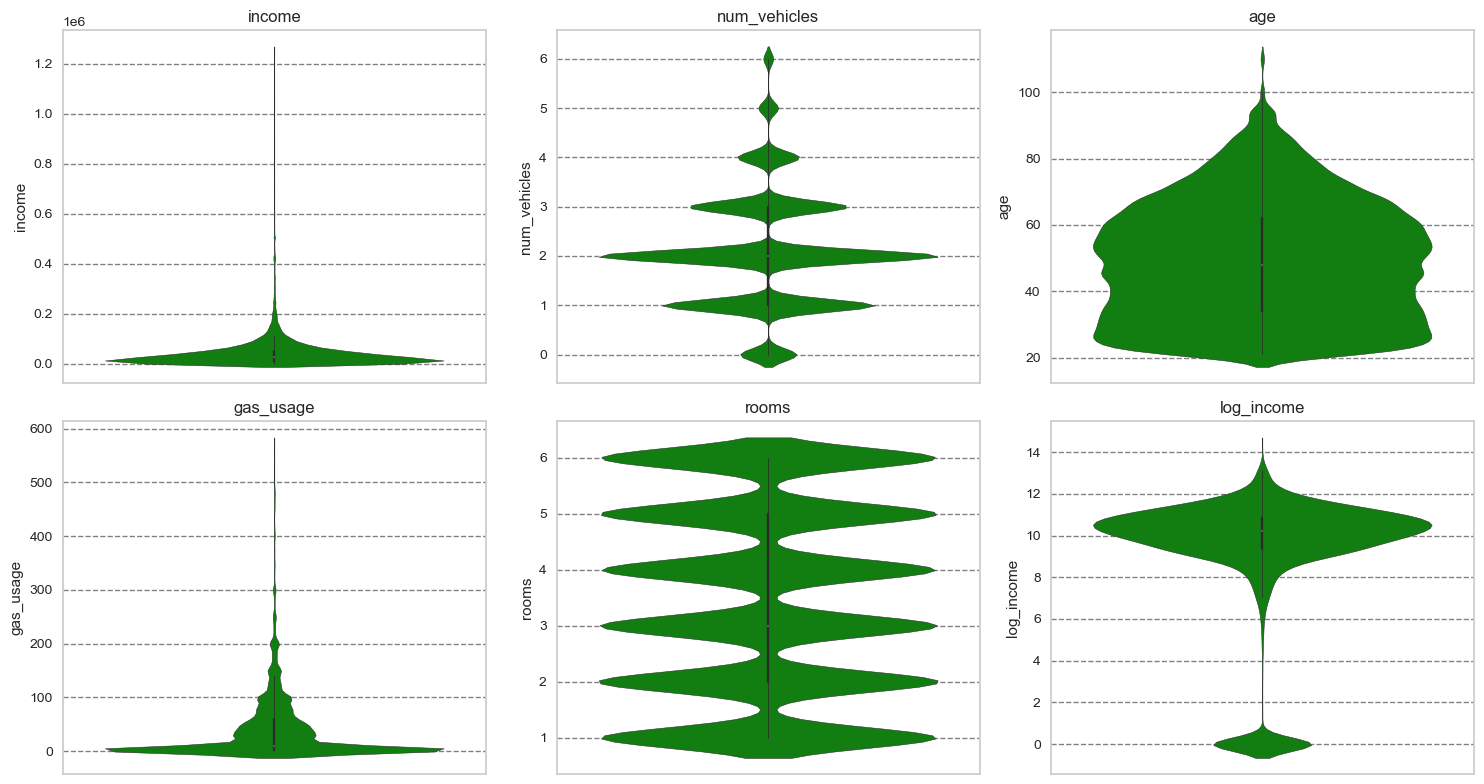

In [25]:
customer_df_numeric= customer_df[['income','num_vehicles','age', 'gas_usage', 'rooms', 'log_income']].copy()
numeric_columns = customer_df.select_dtypes(include=['number'])
plt.figure(figsize= (15, 8))

for i, column in enumerate(numeric_columns , 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y= numeric_columns[column],
                   color= '#009000')
    plt.title(column)
    plt.grid(True, linestyle='--', axis= 'y', color='gray')

plt.tight_layout()
plt.show()

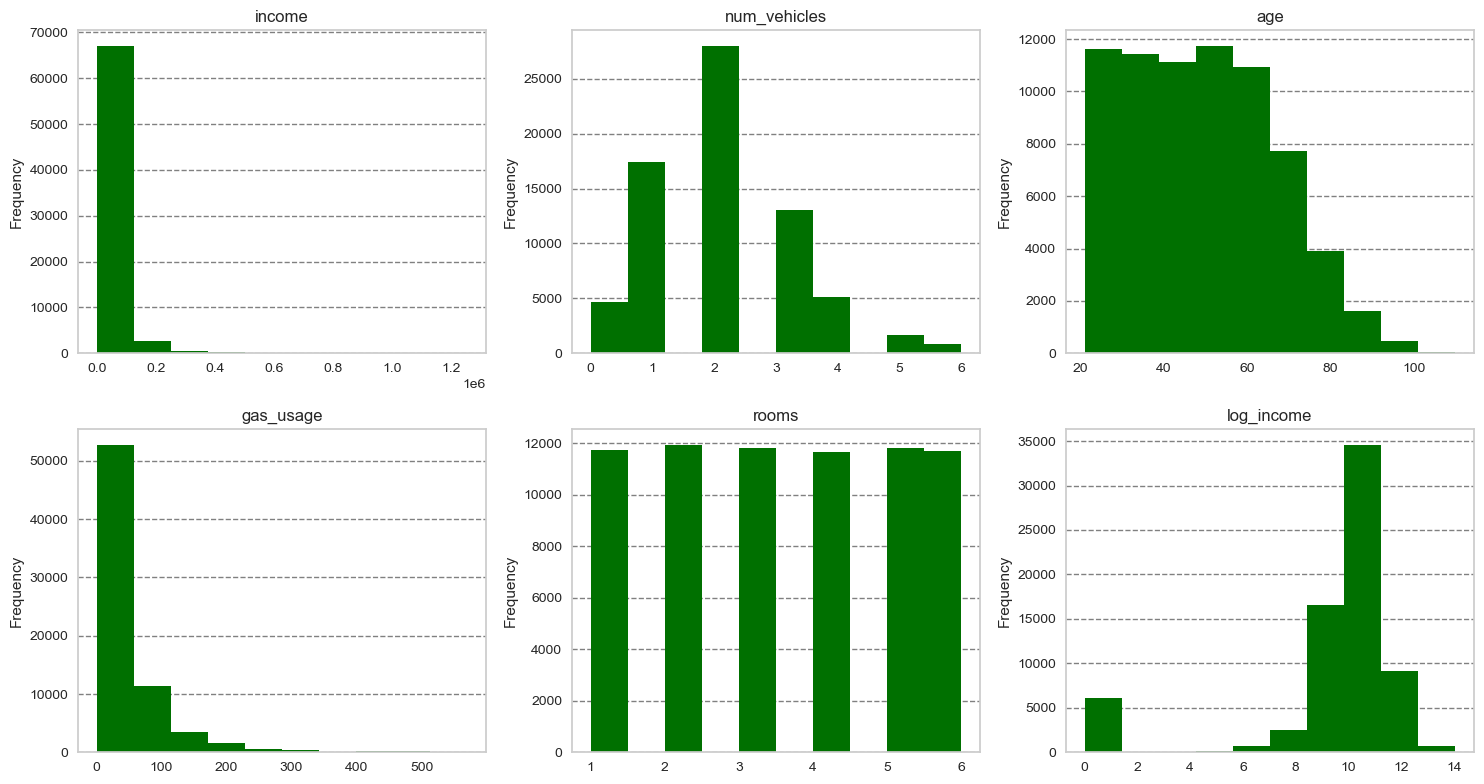

In [26]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    numeric_columns[column].plot(kind='hist', color='#007000', zorder=2)
    plt.title(column)
    plt.grid(False)
    plt.grid(True, linestyle='--', axis='y', color='gray') 
    
plt.tight_layout()
plt.show()

### 2.1: Are they young, middle-aged, or seniors? <a id="part2.1"></a>
- As per the pie chart presented bellow it is possible to see that the distribution of this dataset is 44.7% Middle-aged subjects, 34.2% Young and 21.1% are Seniors

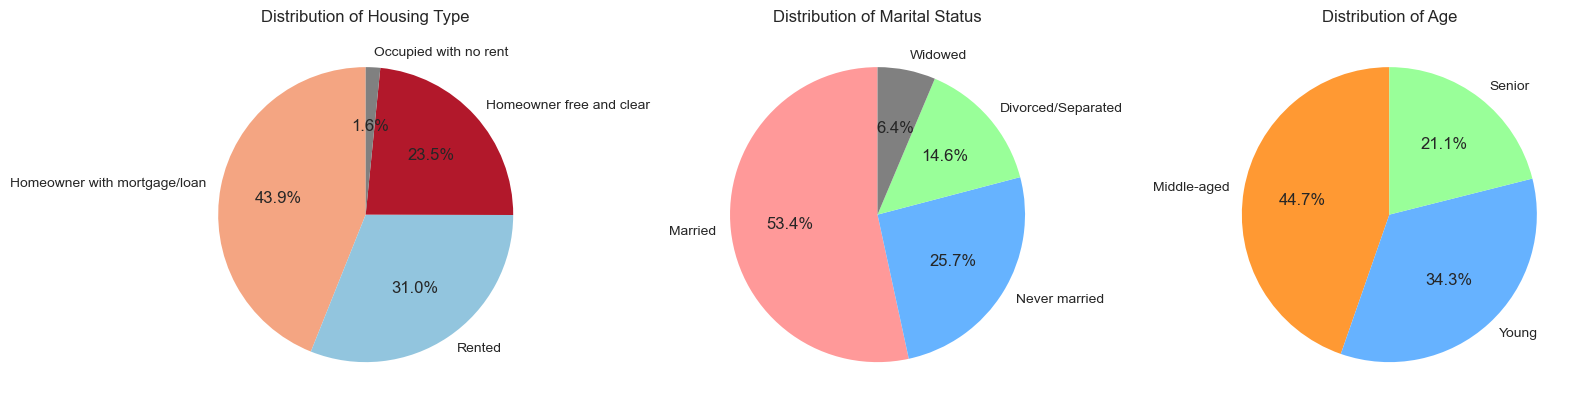

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(16, 10))

#Housing Type
category_counts = customer_df['housing_type'].value_counts()
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,
            colors = ['#f4a582', '#92c5de', '#b2182b', '#808080', '#2166ac'])
axes[0].set_title('Distribution of Housing Type')

#Maritial status
category_counts = customer_df['marital_status'].value_counts()
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,
            colors=['#ff9999', '#66b3ff', '#99ff99', '#808080'])
axes[1].set_title('Distribution of Marital Status')

#Age group
category_counts = customer_df['age_group'].value_counts()
axes[2].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,
    colors = ['#FF9933', '#66B2FF', '#99FF99'])

axes[2].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

### 2.2: How affluent are they? <a id="part2.2"></a>
- The violinplots shows that individuals with health insurance generally have higher log-transformed incomes, and this trend is consistent across the different age groups. 
- Individuals without health insurance show higher variability and are more likely to have lower incomes.

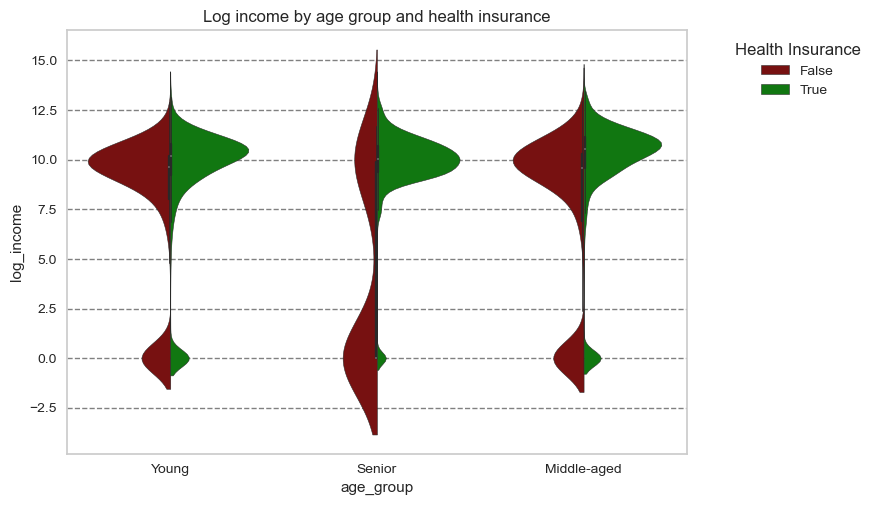

In [28]:
sns.violinplot(data=customer_df,
               x='age_group',
               y='log_income',
               hue='health_ins',
               split=True,
               palette= ['#880000','#008800'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Health Insurance')
plt.title('Log income by age group and health insurance')
plt.grid(True, linestyle='--', axis='y', color='gray') 
plt.show()

### 2.3: Where do they live? <a id="part2.3"></a>
- The entries of the dataset appear to be distributed throught the country with the South being the biggest representation with 37.7% of the entries, followed by West with 23.8%, Midwest with 20.9% and Northwest with 17.7%.
- The state with the more counts was California with 8672 followed by Texas with 5806 and Florida with 4820

In [29]:
usa = gpd.read_file('110m_cultural/ne_110m_admin_1_states_provinces.shp')
residence_counts = customer_df['state_of_res'].value_counts().reset_index()
residence_counts.columns = ['name', 'residence_count']

merged_df= usa.merge(residence_counts, right_on= 'name', left_on= 'name')

In [30]:
fig = px.choropleth(
    merged_df,
    locations='postal',
    locationmode="USA-states",
    color='residence_count',
    color_continuous_scale='OrRd',
    scope="usa",
    labels={'residence_count': 'Number of Residences'},
    title='Heatmap of Customer Distribution'
)

fig.update_layout(
    title_text='Interactive Heatmap of Customer Distribution',
    width=800,
    height=500,
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
    )
)
fig.show()

Text(0.5, 1.0, 'Distribution of residence')

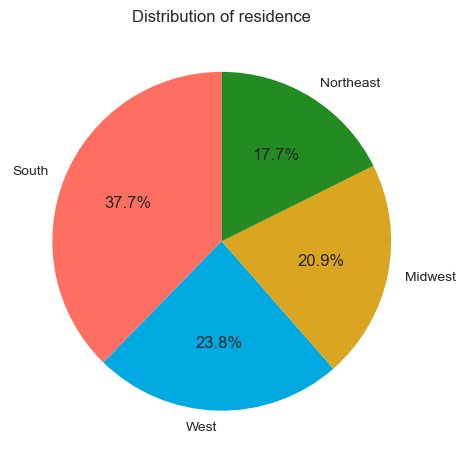

In [31]:
category_counts = customer_df['residence_region'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,
            colors = ['#FF6F61', '#00A9E0', '#DAA520', '#228B22'])
plt.title('Distribution of residence')


### 2.4: Do you see differences in the income related to age, gender or the marital situation?

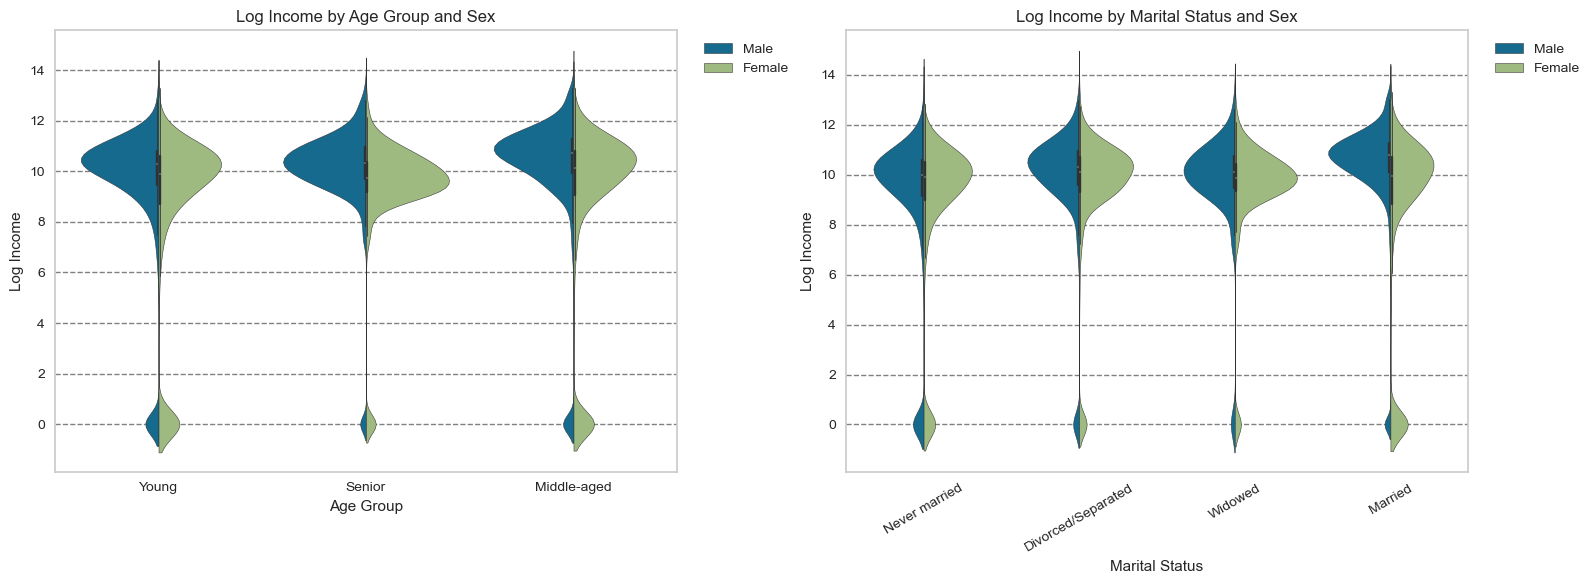

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(data=customer_df, x='age_group', y='log_income', hue='sex', split=True, ax=axes[0])
axes[0].set_title('Log Income by Age Group and Sex')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Log Income')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.2, 1))
axes[0].grid(True, linestyle='--', axis='y', color='gray') 

sns.violinplot(data=customer_df, x='marital_status', y='log_income', hue='sex', split=True, ax=axes[1])
axes[1].set_title('Log Income by Marital Status and Sex')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Log Income')
axes[1].tick_params(axis='x', rotation=30)
axes[1].legend(loc='upper right', bbox_to_anchor=(1.2, 1))
axes[1].grid(True, linestyle='--', axis='y', color='gray') 

plt.tight_layout()
plt.show()

### 2.5: Are the characteristics of the housing situation interrelated?

In [33]:
average_gas_usage_per_room_and_type = (
    customer_df.groupby(['housing_type', 'rooms'])['gas_usage']
    .mean()
    .reset_index())

average_gas_usage_per_room_and_type.columns = ['housing_type', 'rooms', 'average_gas_usage']
customer_df_experiment = customer_df.merge(average_gas_usage_per_room_and_type, on=['housing_type', 'rooms'], how='left')

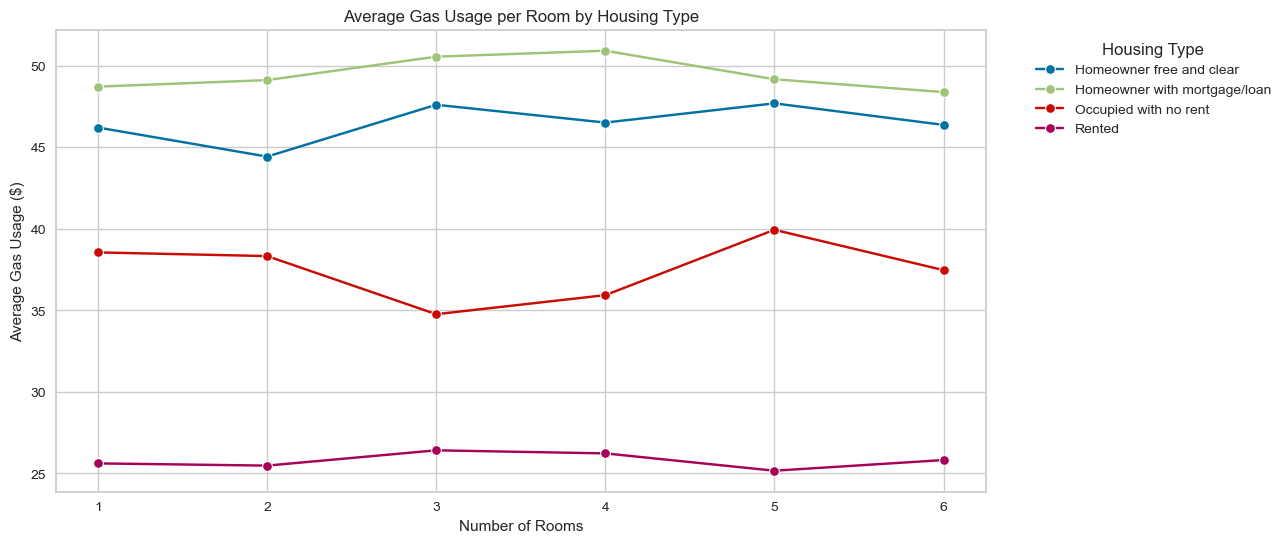

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_gas_usage_per_room_and_type,
             x='rooms',
             y='average_gas_usage',
             hue='housing_type',
             marker='o')

plt.title('Average Gas Usage per Room by Housing Type')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Gas Usage ($)')
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1), title='Housing Type')
plt.xticks()
plt.show()

From the line plot above the following can be observed:
- Homeowners, especially those with a mortgage/loan, have higher gas usage than renters or non-paying occupants, potentially due to larger homes or higher energy needs.
- Rented housing shows the lowest and most consistent gas usage, potentially reflecting smaller homes or stricter energy usage habits.
- Occupied with no rent has inconsistent trends.

### 2.6: What is the relation between age and income?

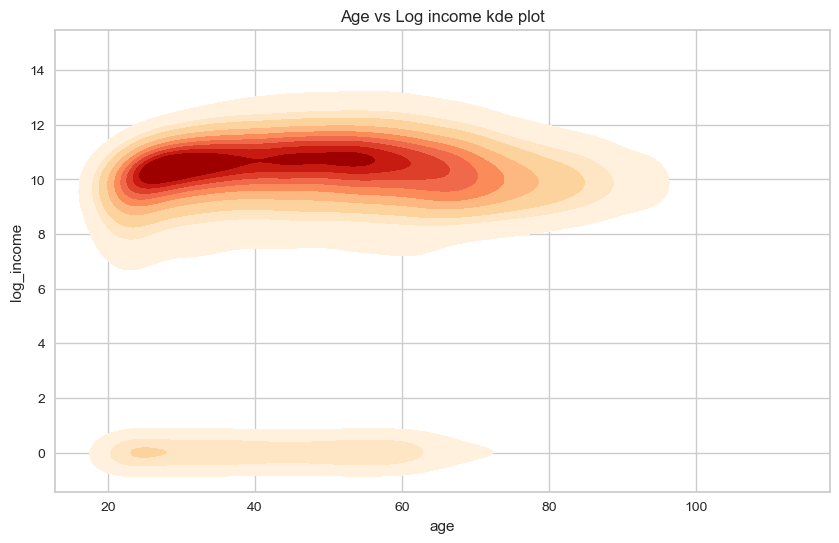

In [35]:
#customer_df_young= customer_df[customer_df['age_group'] == 'Young']
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x= customer_df['age'],
    y= customer_df['log_income'],
    fill= True,
    #size= 'income',
    cmap= 'OrRd',
    legend= True
    #sizes= (0, 2000),
    #alpha= 0.5
)
plt.title('Age vs Log income kde plot')

plt.show()

In [36]:
# Averaging the income per age
average_income_by_age = (
    customer_df.groupby('age')['income']
    .mean()
    .reset_index())

average_income_by_age.columns = ['age', 'average income']

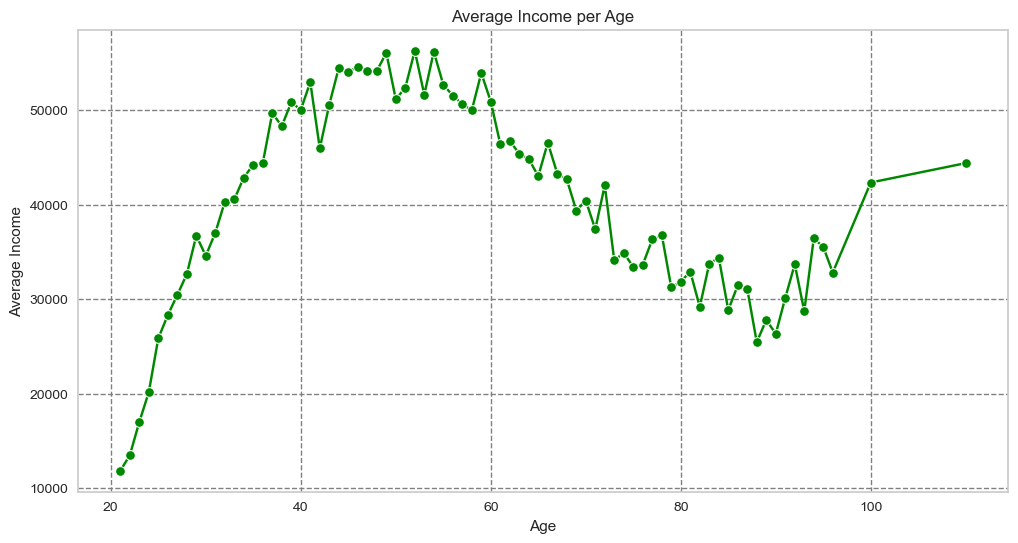

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_income_by_age,
             x='age',
             y='average income',
             marker='o',
             color= '#008800')

plt.title('Average Income per Age')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.xticks()
plt.grid(True, linestyle='--',  color='gray')
plt.show()

From the line plot above the following can be observed:
- Average income increases over the years and peak during midlife followed by a decline in later years. The slight increase after age 90 might be caused by small sample sizes in older age groups.

### 2.7: Visualize the probability of health insurance by age

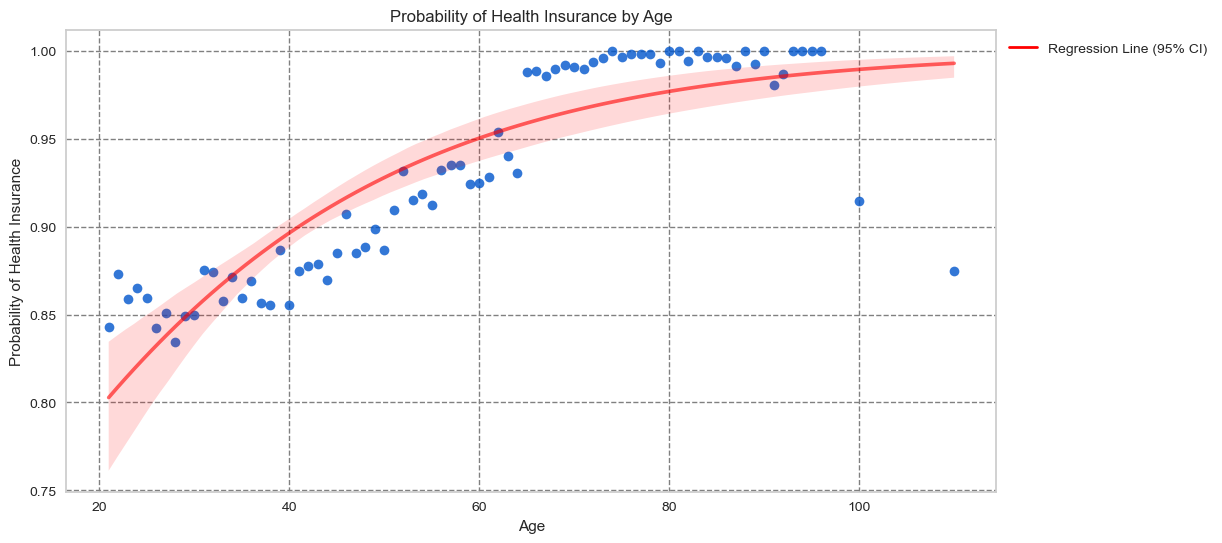

In [38]:
health_insurance_prob_by_age = (
    customer_df.groupby('age')['health_ins']
    .mean()
    .reset_index()
)


health_insurance_prob_by_age.columns = ['age', 'health_insurance_probability']

plt.figure(figsize=(12, 6))
sns.regplot(data=health_insurance_prob_by_age, x='age', y='health_insurance_probability', logistic=True, ci= 95,
            scatter_kws={'color': '#0055cc'},
            line_kws={'alpha': 0.6, 'color': 'red'})

plt.title('Probability of Health Insurance by Age')
plt.xlabel('Age')
plt.ylabel('Probability of Health Insurance')
plt.xticks()
handles = [
    plt.Line2D([0], [0], color='red', lw=2, label='Regression Line (95% CI)')
]
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--',  color='gray', zorder= 1)
plt.show()

From the plot above the following can be observed:
- The probability of health insurance appears to increase with age
- The increase is steepest between ages 20 and 50, then starts to level off as the probability approaches 1.0 in older age groups.
- The 95% CI is wider for younger ages, indicating more uncertainty about the relationship there, and narrows for middle-aged and older individuals.
- Individuals older than 60 have a probability close to 1 of ahaving health insurance

### 2.8: Visualize the marital status according to the housing type

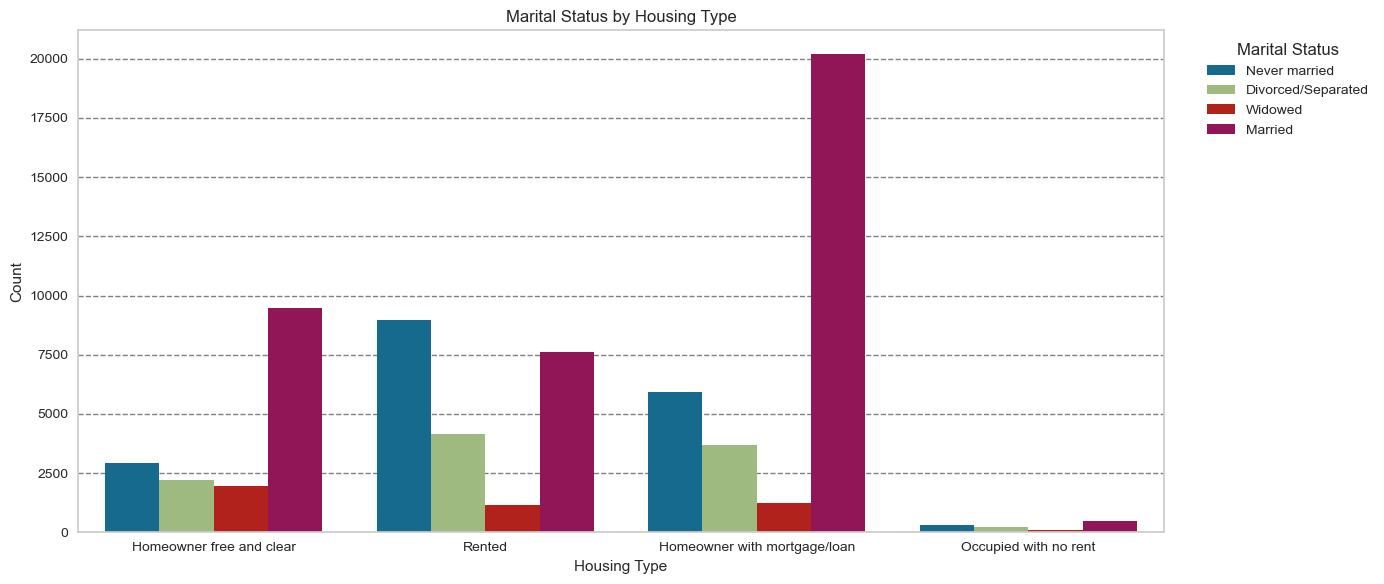

In [39]:
plt.figure(figsize=(14, 6))

sns.countplot(data=customer_df, x='housing_type', hue='marital_status', zorder= 2)

plt.title('Marital Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Marital Status')
plt.grid(True, linestyle='--', axis= 'y', color='gray')
plt.tight_layout()

From the bar plot above the following can be observed:
- In all categories, with exeption to housing type "rented", the Married status appears to be the most common status which by far comprises the highest entry count.

### 2.9: How the health insurance distributes according to the marital status?

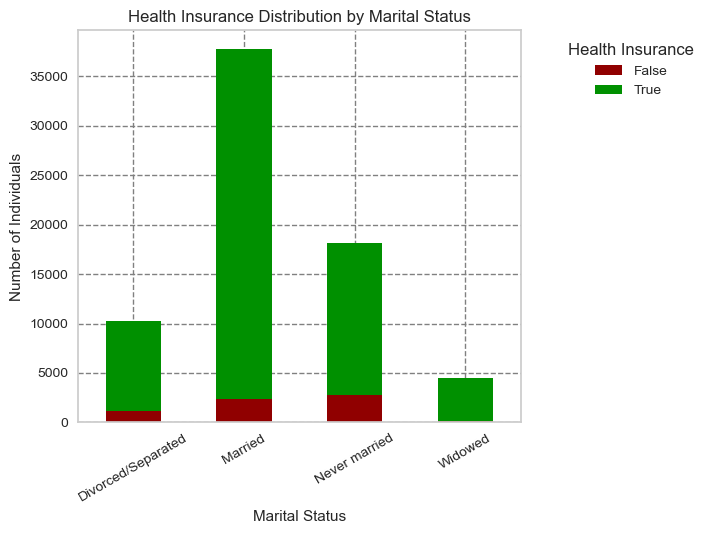

In [40]:
insurance_distribution = customer_df.groupby(['marital_status', 'health_ins']).size().unstack(fill_value=0)

insurance_distribution.plot(kind='bar', stacked=True, color=['#900000','#009000'], zorder= 2)
plt.title('Health Insurance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1), title='Health Insurance')
plt.grid(True, linestyle='--', color='gray')

plt.tight_layout()
plt.show()

From the bar plot above the following can be observed:
- Across all marital statuses, having health insurance seems to be the more common case.
- The highest count of individuals without health insurance appears to be among those who are "never married."

## **Part 3**: Dataset optimization for each model & Correlation matrices <a id="part3"></a>

### **Part 3.1**: Standardization and one hot encoding  <a id="part3.1"></a>

In [41]:
# all columns
# Sort the columns by the number of unique values

customer_df = customer_df.sample(frac=1)

one_hot_encoded_df= pd.get_dummies(customer_df, columns=['sex', 'marital_status', 'housing_type', 
                                                         'residence_region', 'age_group'], drop_first=True)


In [42]:
scaler = StandardScaler()
variables_to_standardize = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms', 'log_income']

one_hot_standard_df = one_hot_encoded_df
one_hot_standard_df[variables_to_standardize] = scaler.fit_transform(one_hot_standard_df[variables_to_standardize])

standardized_numerical_df = pd.DataFrame(
    scaler.fit_transform(customer_df[variables_to_standardize]),
    columns=variables_to_standardize,
    index=customer_df.index
)

categorical_df = customer_df[['sex', 'marital_status', 'housing_type', 'residence_region', 'age_group', 'health_ins', "custid"]]

standard_df = pd.concat([standardized_numerical_df, categorical_df], axis=1)

print(one_hot_standard_df.describe())


             income  num_vehicles           age     gas_usage         rooms  \
count  7.064900e+04  7.064900e+04  7.064900e+04  7.064900e+04  7.064900e+04   
mean  -1.508605e-17 -1.913916e-16 -5.692468e-17  1.272257e-17 -2.413767e-18   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min   -7.269861e-01 -1.766690e+00 -1.594462e+00 -6.370135e-01 -1.461902e+00   
25%   -5.343355e-01 -9.119458e-01 -8.580133e-01 -6.053495e-01 -8.759654e-01   
50%   -2.581461e-01 -5.720153e-02 -6.491457e-02 -4.945257e-01 -2.900284e-01   
75%    1.612527e-01  7.975427e-01  7.281841e-01  2.970730e-01  8.818456e-01   
max    2.070327e+01  3.361776e+00  3.447380e+00  8.371380e+00  1.467783e+00   

         log_income  
count  7.064900e+04  
mean  -2.045668e-16  
std    1.000007e+00  
min   -3.035118e+00  
25%   -1.015779e-03  
50%    2.881113e-01  
75%    4.958418e-01  
max    1.530753e+00  


In [43]:
abbr = ["Cust id", "Is Employed", "Income", "Health Ins" ,"Num Vehicles", "Age", "Gas Usage", "Rooms", "Recent Move", "Log Income", "Male", "Married", "Never Married", "Widowed", "Homeower w/ Mortgage/Loan", "Occupied w/ no rent", "Rented", "North East", "South", "West", "Senior", "Young"]

one_hot_standard_df_aux = one_hot_standard_df.drop(["state_of_res"], axis=1)
correlation_matrix_all = one_hot_standard_df_aux.corr()

health_ins_true = one_hot_standard_df_aux[one_hot_standard_df_aux['health_ins'] == 1]
health_ins_false = one_hot_standard_df_aux[one_hot_standard_df_aux['health_ins'] == 0]

relevant_cols = ['health_ins'] + [col for col in one_hot_standard_df_aux.columns if col != 'health_ins' and abs(correlation_matrix_all['health_ins'][col]) > 0.1]


### **Part 3.2**: Correlation matrices  <a id="part3.2"></a>

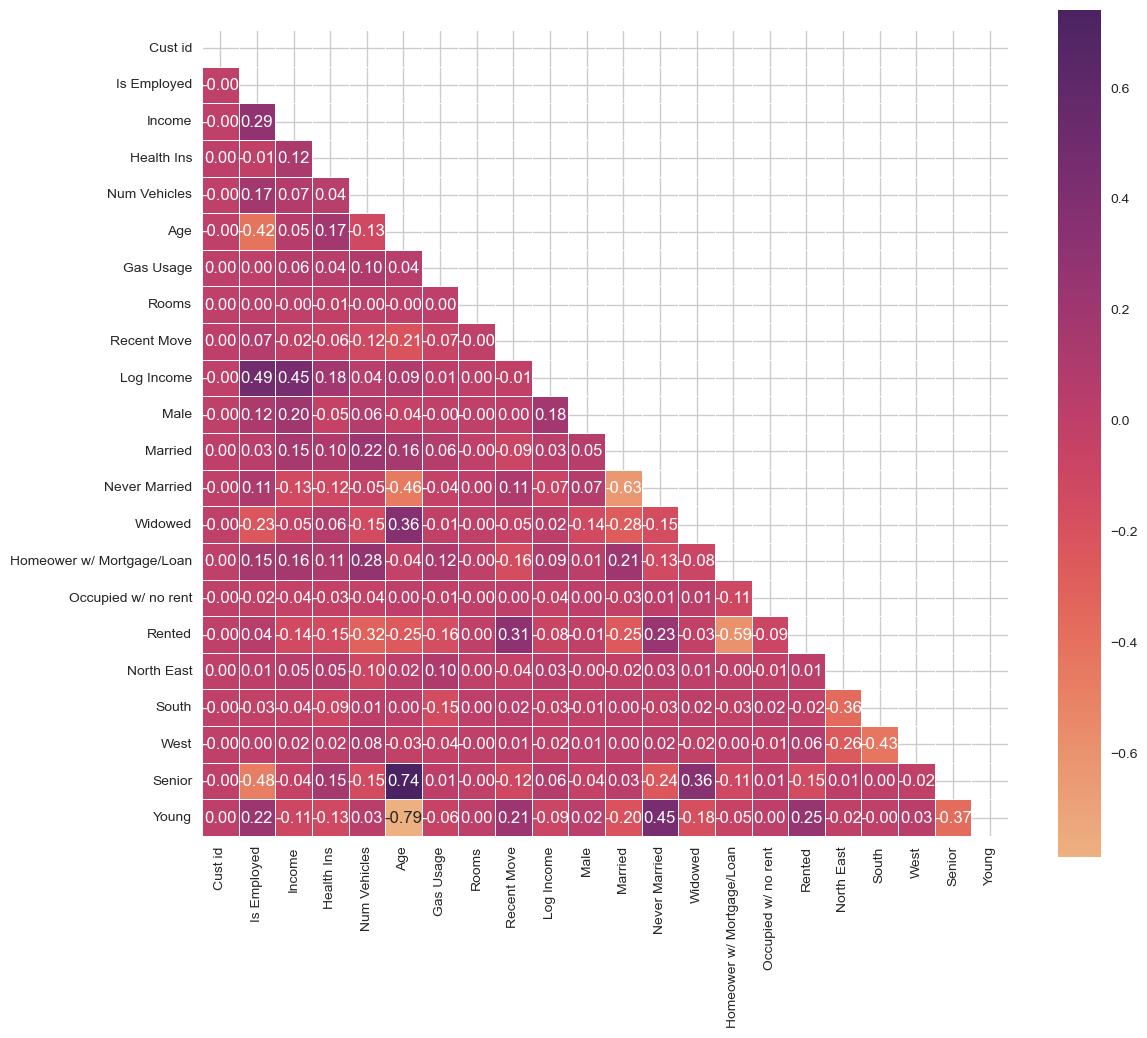

In [44]:

correlation_matrix_abbr = correlation_matrix_all.copy()
correlation_matrix_abbr.columns = abbr
correlation_matrix_abbr.index = abbr
mask = np.triu(np.ones_like(correlation_matrix_abbr, dtype=bool))

plt.figure(figsize=(13, 11))
sns.heatmap(correlation_matrix_abbr,
            cmap='flare',
            square=True,
            cbar=True,
            annot=True,
            fmt='.2f',
            mask=mask,
            linewidths=0.5,
            linecolor='white')
plt.show()

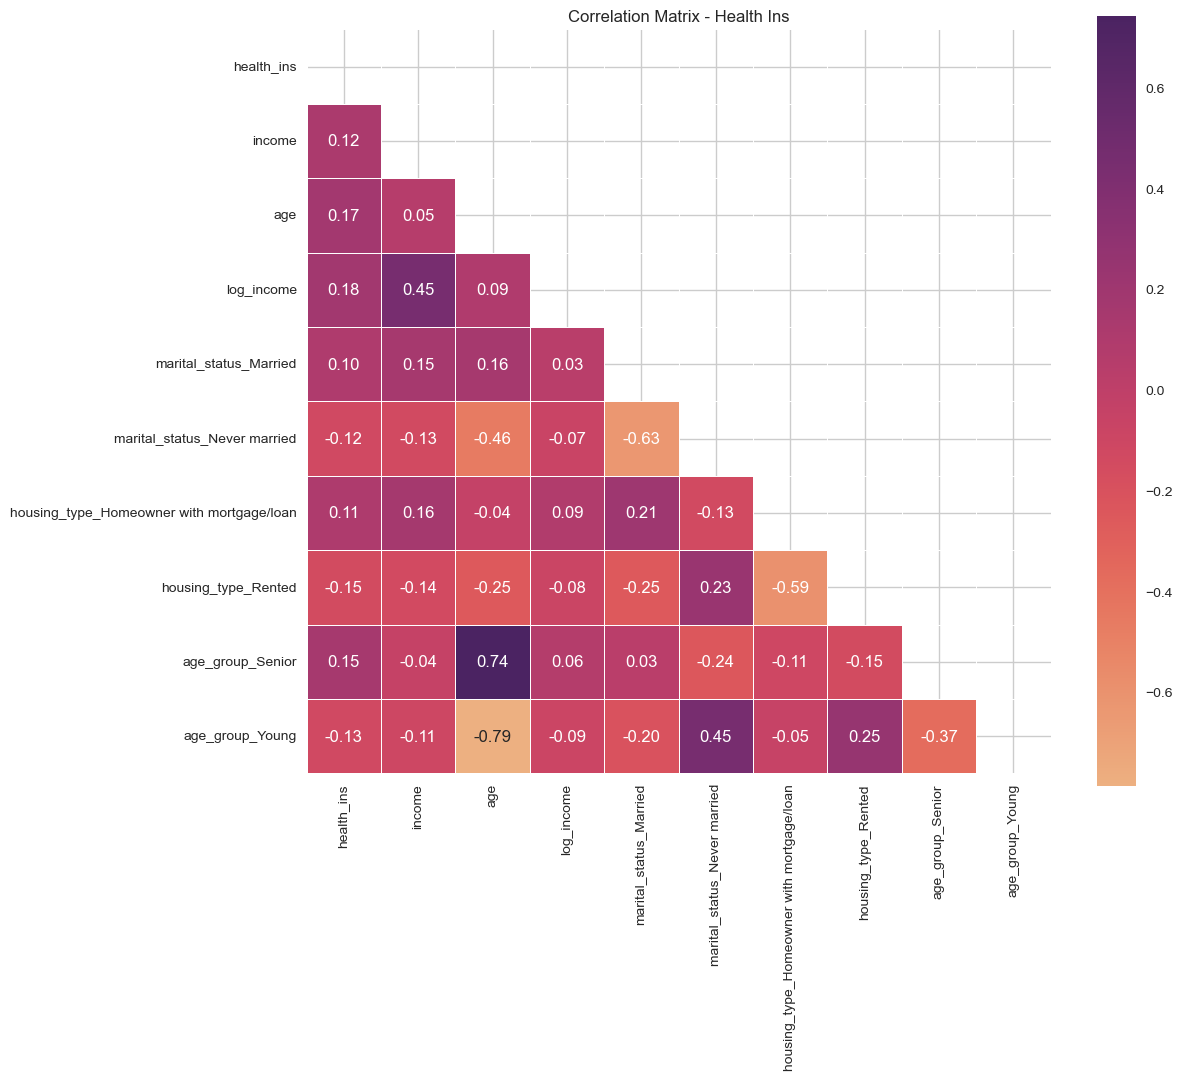

In [45]:
relevant_cols = ['health_ins'] + [col for col in one_hot_standard_df_aux.columns if col != 'health_ins' and abs(correlation_matrix_all['health_ins'][col]) > 0.1]
relevant_df = one_hot_standard_df[relevant_cols]
relevant_corr = relevant_df.corr()

mask = np.triu(np.ones_like(relevant_corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(relevant_corr,
            cmap='flare',
            square=True,
            cbar=True,
            annot=True,
            fmt='.2f',
            mask=mask,
            linewidths=0.5,
            linecolor='white')
plt.title('Correlation Matrix - Health Ins')
plt.show()

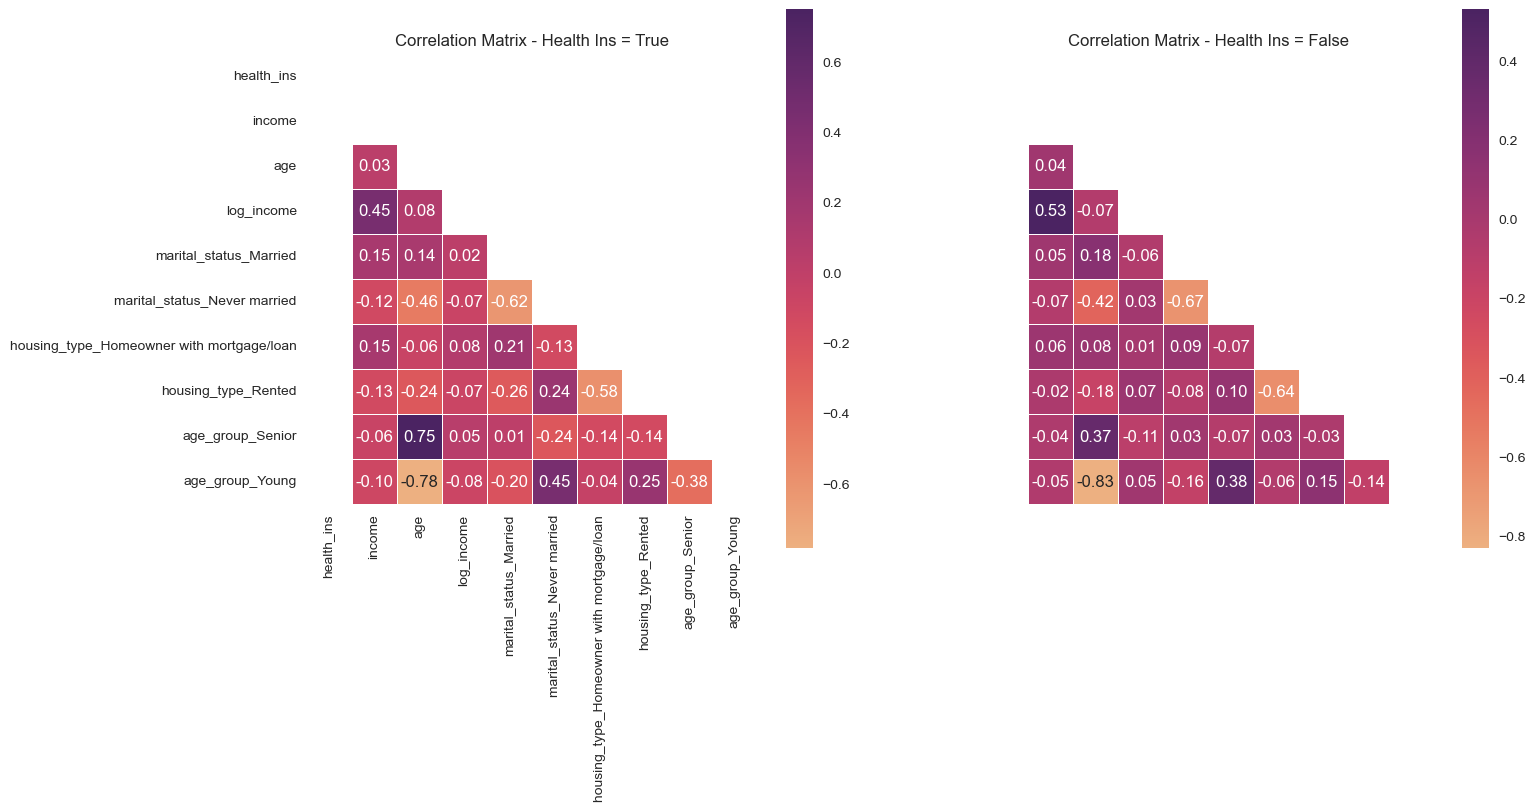

In [46]:
health_ins_true_corr = health_ins_true[relevant_cols].corr()
health_ins_false_corr = health_ins_false[relevant_cols].corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

mask = np.triu(np.ones_like(health_ins_true_corr, dtype=bool))
sns.heatmap(health_ins_true_corr,
            cmap='flare',
            square=True,
            cbar=True,
            annot=True,
            fmt='.2f',
            mask=mask,
            linewidths=0.5,
            linecolor='white',
            ax=ax1)
ax1.set_title('Correlation Matrix - Health Ins = True')
ax1.grid(False)

mask = np.triu(np.ones_like(health_ins_false_corr, dtype=bool))
sns.heatmap(health_ins_false_corr,
            cmap='flare',
            square=True,
            cbar=True,
            annot=True,
            fmt='.2f',
            mask=mask,
            linewidths=0.5,
            linecolor='white',
            ax=ax2,
            xticklabels=False,
            yticklabels=False)

ax2.set_title('Correlation Matrix - Health Ins = False')

plt.show()

When health_ins is set to True (Left heatmap):
- The variable with the highest positive correlation is log_income (<span style="color:green">0.45</span>).
- The variables with the highest negative correlations are marital_status_Never married (<span style="color:red">-0.62</span>) and age_group_Young (<span style="color:red">-0.38</span>).

When health_ins is set to False (Right heatmap):
- The variables with the highest positive correlations are income (<span style="color:green">0.53</span>) and marital_status_Married (<span style="color:green">0.18</span>).
- The variables with the highest negative correlations are marital_status_Never married (<span style="color:red">-0.67</span>), housing_type_Rented (<span style="color:red">-0.64</span>), and age_group_Young (<span style="color:red">-0.14</span>).

In general, the variables related to income (income, log_income), marital status (marital_status_Married, marital_status_Never married) and age group (age_group_Senior, age_group_Young) show the highest correlations, both positive and negative, with the ‘health_ins’ variable of interest.

We can therefore conclude that socioeconomic and demographic factors are strongly associated with health insurance ownership, particularly income, marital status and age group.

##  **Part 4**: Feature Selection and SMOTE <a id="part4"></a>

### **Part 4.1**: Feature Selection using KBest <a id="part4.1"></a>

In [47]:

X= one_hot_standard_df.drop(columns= ['health_ins', 'custid', 'income', 'state_of_res'], axis= 1)
y= one_hot_standard_df.health_ins

To select the best features, we did 3 methods to see the 10 features with more apperances.

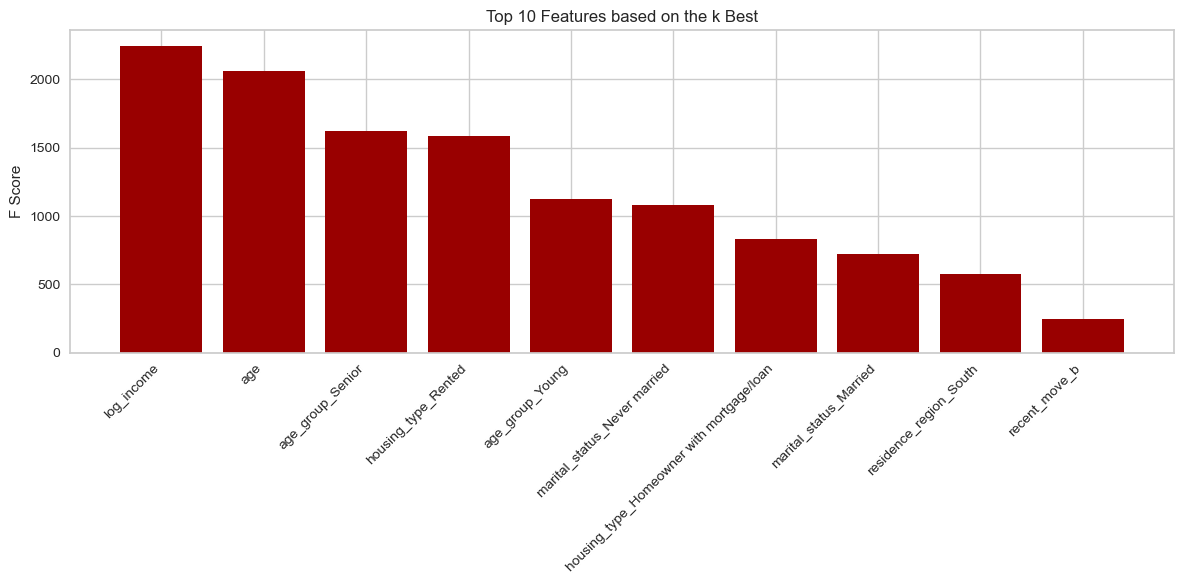

In [48]:
# Select the best features
k_best_f = SelectKBest(score_func=f_classif, k='all')
fit_f = k_best_f.fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F Score': fit_f.scores_,
    'P-value': fit_f.pvalues_
})

# Sort the features based on the F Score
feature_scores = feature_scores.sort_values('F Score', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_scores['Feature'][:10], feature_scores['F Score'][:10], color= '#990000')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Features based on the k Best')
plt.ylabel('F Score')
plt.tight_layout()
plt.show()


### **Part 4.2**: Feature Selection using Random Forest <a id="part4.2"></a>

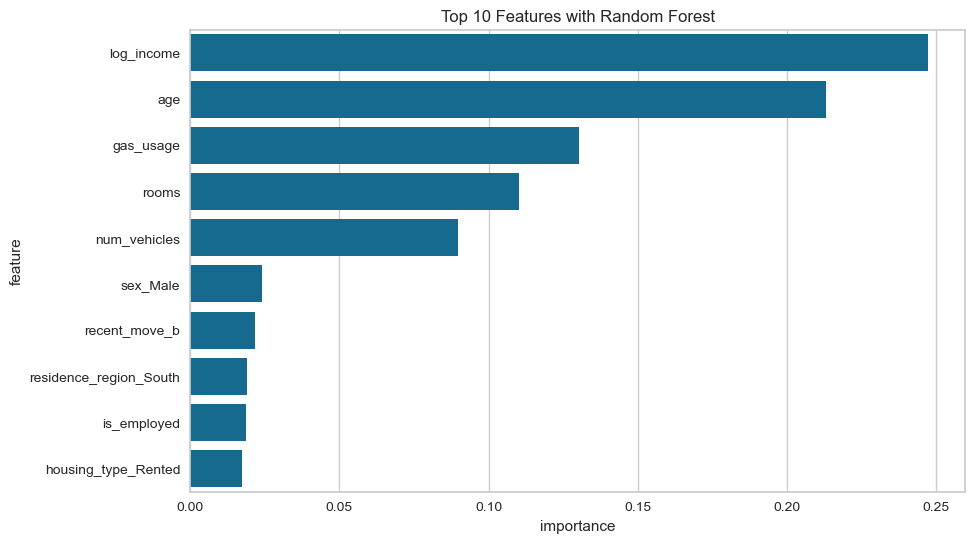

In [49]:
#Feature Importance with Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features with Random Forest')
plt.show()

### **Part 4.3**: Feature Selection using RFE <a id="part4.3"></a>

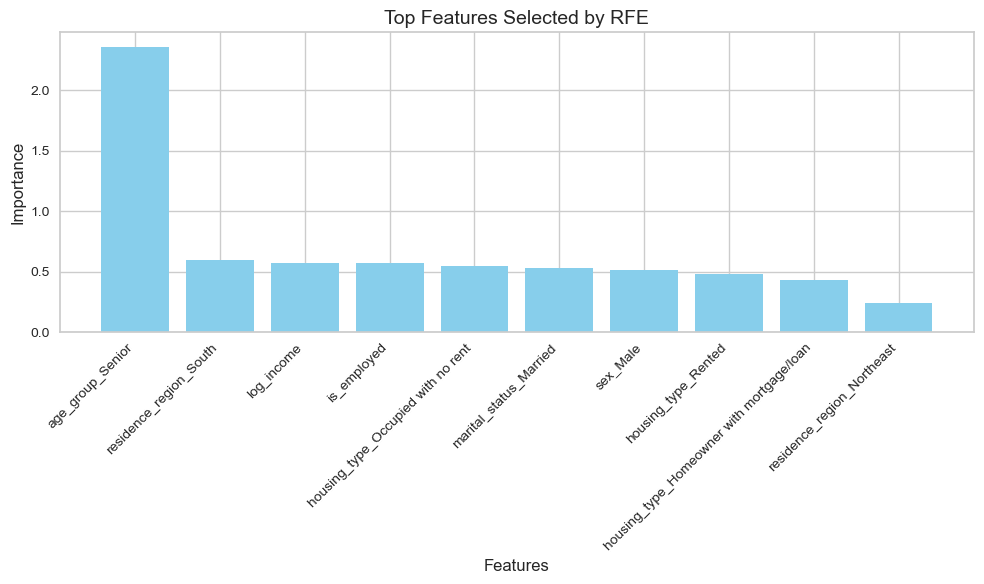

In [50]:
# Select the best features using RFE
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10)
rfe_selector = rfe_selector.fit(X, y)

selected_features = X.columns[rfe_selector.support_]

importances = np.abs(rfe_selector.estimator_.coef_[0])

selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(selected_features_df['Feature'], selected_features_df['Importance'], color='skyblue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Top Features Selected by RFE', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

With the results, we select this features:
**"log_income"** **"age"** **"gas_usage"** **"rooms"** **"num_vehicles"** **"sex_Male"** **"recent_move_b"** **"is_employed"** **"marital_status_Married"** **"residence_region_South"**

### **Part 4.4**: SMOTE <a id="part4.1"></a>

Now we need to see the distribuition of the atual dataset:

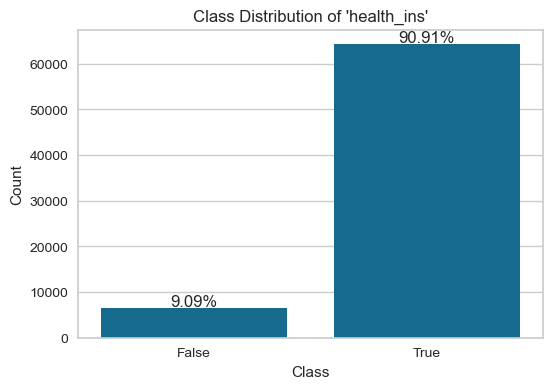

In [52]:

distribution = one_hot_encoded_df['health_ins'].value_counts()


distribution_df = distribution.reset_index()
distribution_df.columns = ['Class', 'Count']


distribution_df['Class'] = pd.Categorical(distribution_df['Class'], categories=[False, True], ordered=True)


plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Count', data=distribution_df, order=[False, True]) 
plt.xticks(rotation=0)  
plt.title("Class Distribution of 'health_ins'")
plt.xlabel("Class")
plt.ylabel("Count")

for i, v in enumerate(distribution_df.sort_values('Class')['Count']):
    plt.text(i, v + 500, f"{v / distribution.sum() * 100:.2f}%", ha='center')  # Ajuste vertical

plt.show()



The imbalance of the dataset is evident, with the majority of entries having health insurance. This imbalance is likely to affect the performance of the model, as it will be biased towards predicting that most entries have health insurance.



##### To balance the data, we used the **Synthetic Minority Over-sampling Technique (SMOTE)**. 
- The **SMOTE algorithm** generates synthetic samples of the minority class by interpolating between existing samples.

In [251]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
])

X_resampled, y_resampled = pipeline.fit_resample(X, y)

Now we did a train test split with the new dataset (balanced) and with the older one, to test some models with this two configurations.

To test with the older dataset (imbalanced) we will use the train set already with SMOTE, but the test_set will be imbalanced.

In [252]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state= 8)
X_train_aux, X_val_no_SMOTE, y_train_aux, y_val_no_SMOTE= train_test_split(X, y, test_size=0.3, random_state= 8)

C:\Users\chess\AppData\Local\Temp\ipykernel_38716\3647028102.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



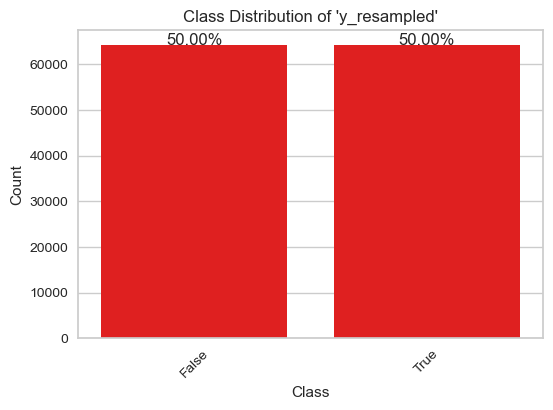

In [253]:
y_resampled_distribution = y_resampled.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=y_resampled_distribution.index, y=y_resampled_distribution.values, color='red')
plt.xticks(rotation=45)
plt.title("Class Distribution of 'y_resampled'")
plt.xlabel("Class")
plt.ylabel("Count")

for i, v in enumerate(y_resampled_distribution.values):
    plt.text(i, v + 5, f"{y_resampled_distribution[i] / y_resampled_distribution.sum() * 100:.2f}%", ha='center')

plt.show()

This is the class distribution after **SMOTE**.

Imbalanced ---  SMOTE ---> Balanced

##  **Part 5**: Models / Experimentation<a id="part5"></a>

In this fase, we evaluated a variety of machine learning models to identify the most effective approach for the given task. The following algorithms were tested: **K-Nearest Neighbors**,two types of **Naive Bayes**- **GaussianNB** and **BernoulliNB**, **Decision Trees**, **Random Forest**, **XGBoost**, **Support Vector Machine (SVM)**, a neural network of the **Multi-Layer Perceptron (MLP)** type and we experimented a meta-model approach combining two diferent neural network models.

To ensure robust results, we employed **cross-validation** techniques and optimized hyperparameters using **Grid-Search** whenever feasible. When Grid Search was computationally impractical or time-consuming, **Random Search** was utilized as an efficient alternative.

The following sections present the results obtained for each model, highlighting their performance, comparisons, and the selected hyperparameters throughout the process.

Finally, we used the test dataset with **SMOTE** (balanced) because we wanted to achieve results more comparable to those obtained on **Kaggle**.

### Dummy classifier

To establish a baseline, we used a Dummy Classifier using test set with and without SMOTE.

In [254]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)


dummy_clf.fit(X_train, y_train)


y_pred = dummy_clf.predict(X_val)
y_pred_no_SMOTE = dummy_clf.predict(X_val_no_SMOTE)

accuracy = accuracy_score(y_val, y_pred)
accuracy_no_SMOTE = accuracy_score(y_val_no_SMOTE, y_pred_no_SMOTE)
f1 = f1_score(y_val, y_pred)
f1_no_SMOTE= f1_score(y_val_no_SMOTE, y_pred_no_SMOTE)
print(f"Accuracy do Dummy Classifier balanced (most_frequent): {accuracy:.2f}")
print(f"F1-Score do Dummy Classifier balanced (most_frequent): {f1:.2f}")
print(f"F1-Score do Dummy Classifier imbalanced (most_frequent): {f1_no_SMOTE:.2f}")
print(f"Accuracy do Dummy Classifier imbalanced (most_frequent): {accuracy_no_SMOTE:.2f}")

Accuracy do Dummy Classifier balanced (most_frequent): 0.50
F1-Score do Dummy Classifier balanced (most_frequent): 0.66
F1-Score do Dummy Classifier imbalanced (most_frequent): 0.95
Accuracy do Dummy Classifier imbalanced (most_frequent): 0.91


Selecting the 10 best feautes for the next models.

In [255]:
best_features = ["log_income", "age", "gas_usage", "rooms", 
                 "num_vehicles", "sex_Male", "recent_move_b", 
                 "is_employed", "marital_status_Married", 
                 "residence_region_South"]

X_val = X_val[best_features]
X_val_no_SMOTE = X_val_no_SMOTE[best_features]
X_resampled_one_hot_stan = X_train[best_features]
y_resampled = y_train

### 5.1: KNN <a id="part4.1"></a>

In [58]:
knn_balanced_one_hot_stan = KNeighborsClassifier(weights='distance')


n_neighbors = list(range(3, 21, 2))
metric = ['euclidean', 'manhattan', 'chebyshev']
param_grid = {'n_neighbors': n_neighbors, 'metric': metric}

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid Search
knn_balanced_one_hot_stan = GridSearchCV(
    knn_balanced_one_hot_stan, param_grid, cv=cv, scoring='f1_weighted', verbose=2
)
knn_balanced_one_hot_stan.fit(X_resampled_one_hot_stan, y_resampled)

print(f"Best params with balanced data: {knn_balanced_one_hot_stan.best_params_}")
print(f"Cross-validation best F1-score with balanced data: {knn_balanced_one_hot_stan.best_score_:.2f}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.4s
[CV] END ....................metric=euclidean,

In [59]:
with open('knn_balanced_model_one_hot_stan.pkl', 'wb') as model_file:
    pickle.dump(knn_balanced_one_hot_stan, model_file)


print("Saved in pickle.")

Saved in pickle.


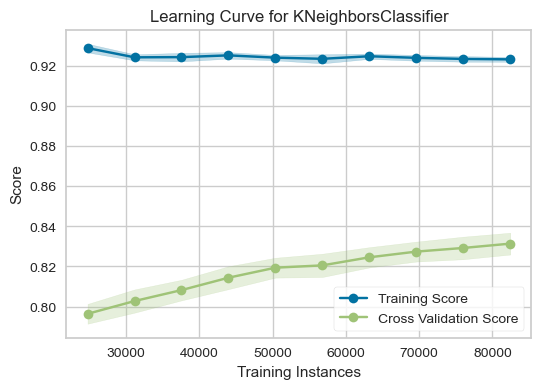

<Axes: title={'center': 'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [60]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Use StratifiedKFold with 12 splits
cv = StratifiedKFold(n_splits=12)

# Define training sizes
sizes = np.linspace(0.3, 1.0, 10)

# Create the LearningCurve visualizer
# Use the best estimator from the GridSearchCV
lc_viz = LearningCurve(
    knn_balanced_one_hot_stan.best_estimator_,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax
)

# Fit the visualizer
lc_viz.fit(X_resampled_one_hot_stan, y_resampled)

# Show the plot
lc_viz.poof()

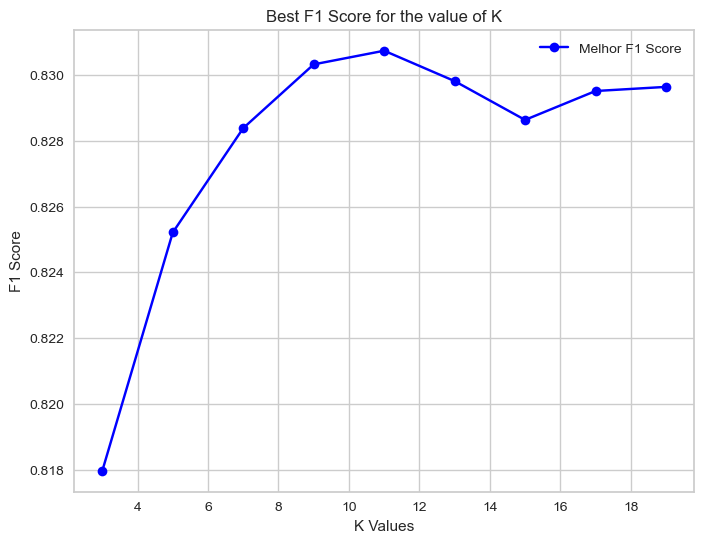

In [70]:

results = knn_balanced_one_hot_stan.cv_results_

k_values = np.unique(results['param_n_neighbors'])


best_scores_per_k = []
for k in k_values:
    
    mask = results['param_n_neighbors'] == k
    
    best_score = np.max(results['mean_test_score'][mask])
    best_scores_per_k.append(best_score)


plt.figure(figsize=(8, 6))
plt.plot(k_values, best_scores_per_k, marker='o', linestyle='-', color='blue', label="Melhor F1 Score")
plt.xlabel("K Values")
plt.ylabel("F1 Score")
plt.title("Best F1 Score for the value of K")
plt.grid(True)
plt.legend()
plt.show()



The best score obtained by the **KNN** was with K=11.

We create a function to save all the results to compare all later.

In [63]:
def metrics_report(model, X_test, y_test):
    """
    Generate a detailed metrics report for a given model and test set.
    
    Parameters:
    - model: The trained model or GridSearchCV object.
    - X_test: Test feature set.
    - y_test: True labels for the test set.
    
    Returns:
    - metrics_df: DataFrame with evaluation metrics.
    - class_report_df: DataFrame with the classification report.
    """
    # Ensure the model is either an estimator or a GridSearchCV object
    estimator = model.best_estimator_ if hasattr(model, 'best_estimator_') else model
    
    # Predictions and probabilities
    test_pred = estimator.predict(X_test)
    test_pred_proba = (
        estimator.predict_proba(X_test)[:, 1] if hasattr(estimator, 'predict_proba') else None
    )
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    roc_auc = roc_auc_score(y_test, test_pred_proba) if test_pred_proba is not None else None
    conf_matrix = confusion_matrix(y_test, test_pred)
    
    # Create metrics DataFrame
    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
        'Score': [accuracy, precision, recall, f1, roc_auc or 'N/A']
    }
    metrics_df = pd.DataFrame(metrics)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"],
                linewidths=0.5, linecolor='black')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification report
    class_report = classification_report(y_test, test_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()

    print("\n=== Classification Report ===")
    display(
        class_report_df.style.format(precision=3).set_properties(**{
            'font-size': '14px', 'text-align': 'center'
        }).set_table_styles([{
            'selector': 'th',
            'props': [('font-size', '15px'), ('text-align', 'center')]
        }])
    )
    
    return metrics_df, class_report


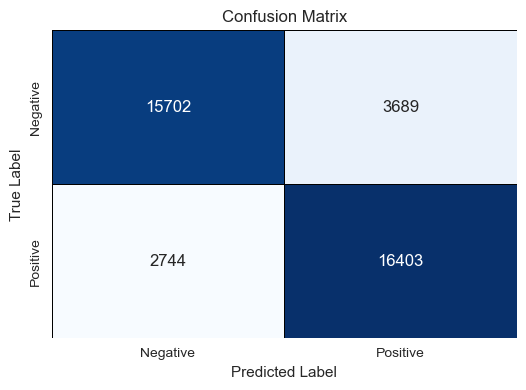


=== Classification Report ===


In [112]:
metrics_df_knn_one_stan, class_report_knn_one_stan = metrics_report(knn_balanced_one_hot_stan, X_val, y_val)

### 5.2: Naives Bayes <a id="part5.2"></a>

#### Gaussian NB

In [64]:

gnb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  
}

grid_search_bayesian_one_stan = GridSearchCV(gnb, param_grid, cv=10, scoring='f1_weighted', verbose=2)
grid_search_bayesian_one_stan.fit(X_resampled_one_hot_stan, y_resampled)

print(f"Best params with balanced data: {grid_search_bayesian_one_stan.best_params_}")
print(f"Cross-validation best F1-score with balanced data: {grid_search_bayesian_one_stan.best_score_:.2f}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.

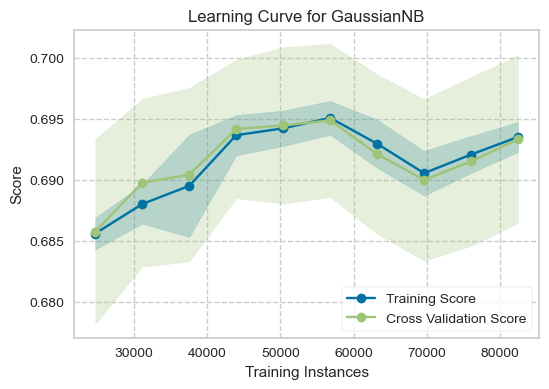

<Axes: title={'center': 'Learning Curve for GaussianNB'}, xlabel='Training Instances', ylabel='Score'>

In [65]:

fig, ax = plt.subplots(figsize=(6, 4))


cv = StratifiedKFold(n_splits=12)


sizes = np.linspace(0.3, 1.0, 10)


lc_viz = LearningCurve(
    grid_search_bayesian_one_stan.best_estimator_,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax
)


lc_viz.fit(X_resampled_one_hot_stan, y_resampled)
ax.grid(linestyle='--')

lc_viz.poof()

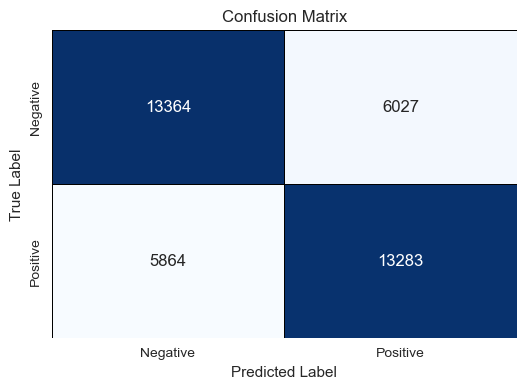


=== Classification Report ===


In [66]:
metrics_df_gnb_one_stan, class_report_gnb_one_stan = metrics_report(grid_search_bayesian_one_stan, X_val, y_val)

In [67]:
with open('bayesian_balanced_model_one_hot.pkl', 'wb') as model_file:
    pickle.dump(grid_search_bayesian_one_stan, model_file)

print("Saved in pickle.")

Saved in pickle.


In [68]:

bnb = BernoulliNB()

param_grid_bernoulli = {
    'alpha': np.linspace(0.1, 1.0, num=10),  
    'fit_prior': [True, False],              
    'binarize': [0.0, 0.5, 1.0]              
}

grid_search_bernoulli_one_stan = GridSearchCV(bnb, param_grid_bernoulli, cv=10, scoring='f1_weighted', verbose=2)
grid_search_bernoulli_one_stan.fit(X_resampled_one_hot_stan, y_resampled)

print(f"Best params with balanced data: {grid_search_bernoulli_one_stan.best_params_}")
print(f"Cross-validation best F1-score with balanced data: {grid_search_bernoulli_one_stan.best_score_:.2f}")

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ............alpha=0.1, binarize=0.0, fit_prior=True; total time=   0.0s
[CV] END ...........alpha=0.1, binarize=0.0, fit_prior=False; total time=   0.0s
[CV] END ...........alpha=0.1, binarize=0.0, f

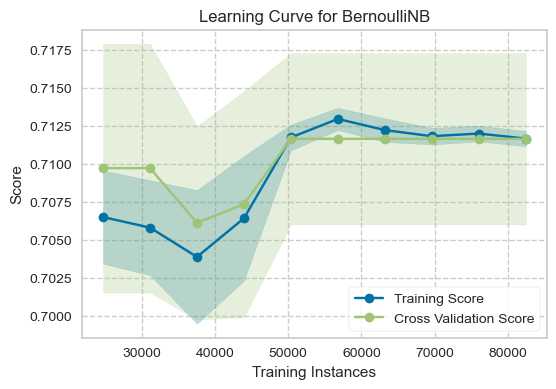

<Axes: title={'center': 'Learning Curve for BernoulliNB'}, xlabel='Training Instances', ylabel='Score'>

In [69]:

fig, ax = plt.subplots(figsize=(6, 4))


cv = StratifiedKFold(n_splits=12)


sizes = np.linspace(0.3, 1.0, 10)

lc_viz = LearningCurve(
    grid_search_bernoulli_one_stan.best_estimator_,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax
)


lc_viz.fit(X_resampled_one_hot_stan, y_resampled)
ax.grid(linestyle='--')

lc_viz.poof()

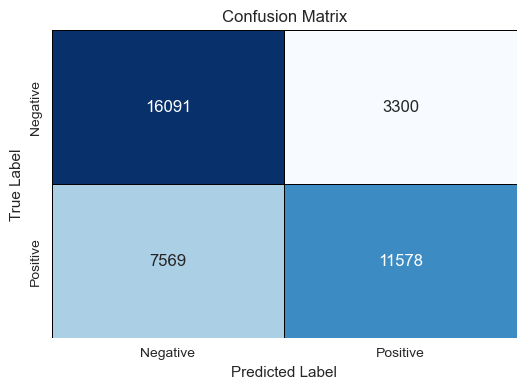


=== Classification Report ===


In [71]:
metrics_df_bnb_one_stan, class_report_bnb_one_stan = metrics_report(grid_search_bernoulli_one_stan, X_val, y_val)

As we can see, the **Bernoulli NB** had a best performance in this task compared to the **Gaussian NB**.

In [72]:
with open('bernoulli_balanced_model_one_hot.pkl', 'wb') as model_file:
    pickle.dump(grid_search_bernoulli_one_stan, model_file)

print("Saved in pickle.")

Saved in pickle.


### 5.3: Decision Trees <a id="part5.3"></a>

In [79]:

dt_model = DecisionTreeClassifier(random_state=42)


param_grid_dt = {
    'max_depth': [2,3, 4,5, 6, 7],
    'min_samples_split': [10, 20, 50, 100],
    'min_samples_leaf': [5, 10, 20, 50],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.1] 
}


inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_dt = GridSearchCV(
    dt_model, 
    param_grid_dt, 
    scoring='f1_weighted', 
    cv=inner_cv, 
    verbose=2
)
grid_search_dt.fit(X_resampled_one_hot_stan, y_resampled)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


nested_scores = cross_val_score(
    grid_search_dt, 
    X_resampled_one_hot_stan, 
    y_resampled, 
    scoring='f1_weighted', 
    cv=outer_cv, 
    verbose=2
)

print(f"Nested CV F1-weighted scores: {nested_scores}")
print(f"Mean Nested CV F1-weighted score: {nested_scores.mean():.2f}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, 

c:\Users\chess\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_spl

To reduce the **overfitting**, we defined **max_deph = [2,3, 4,5, 6, 7]**, to better generalize the data, and to further addredd this issue, we use 'ccp_alpha' to prune the decision tree.

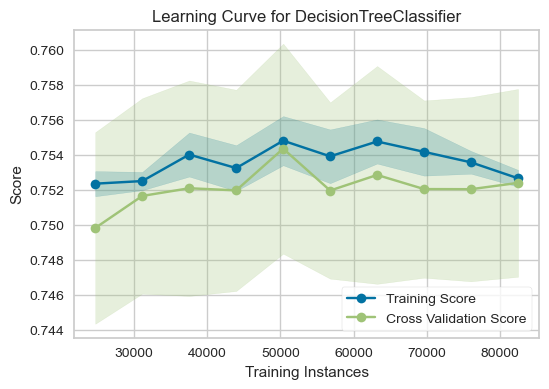

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [80]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Use StratifiedKFold with 12 splits
cv = StratifiedKFold(n_splits=12)

# Define training sizes
sizes = np.linspace(0.3, 1.0, 10)

# Create the LearningCurve visualizer
# Use the best estimator from the GridSearchCV
lc_viz = LearningCurve(
    grid_search_dt.best_estimator_,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax
)

# Fit the visualizer
lc_viz.fit(X_resampled_one_hot_stan, y_resampled)

# Show the plot
lc_viz.poof()

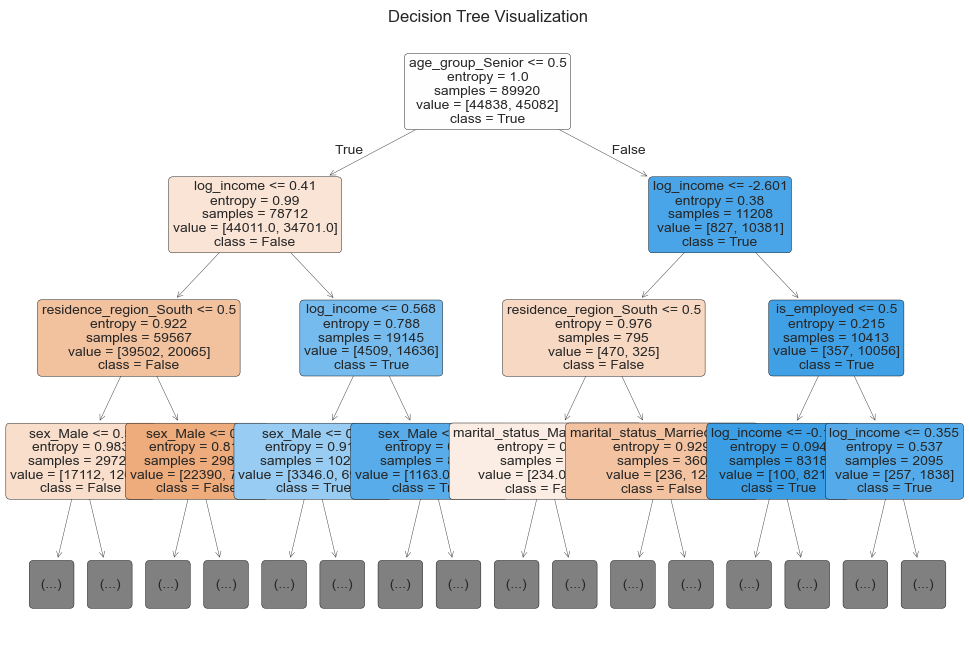

In [81]:
plt.figure(figsize=(12, 8))
plot_tree(grid_search_dt.best_estimator_,
          filled=True,
          feature_names=X_resampled_one_hot_stan.columns,
          class_names=['False', 'True'],
          rounded=True,
          fontsize=10,
          max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

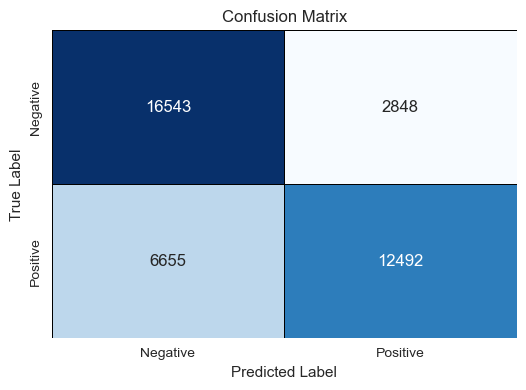


=== Classification Report ===


In [82]:
metrics_df_dt_one_stan, class_report_dt_one_stan = metrics_report(grid_search_dt, X_val, y_val)

### 5.4: Random Forest <a id="part5.4"></a>

In [83]:
ensemble_model = RandomForestClassifier(random_state=42)

param_grid_ensemble = {
    'max_depth': [2,3, 4,5, 6, 7],
    'min_samples_split': [10, 20, 50, 100],
    'min_samples_leaf': [5, 10, 20, 50],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.1]  # Prune
}
grid_search_ensemble_one_stan = GridSearchCV(ensemble_model, param_grid_ensemble, cv=5, scoring='f1_weighted', verbose=2)

grid_search_ensemble_one_stan.fit(X_resampled_one_hot_stan, y_resampled)

print(f"Best parameters for Random Forest: {grid_search_ensemble_one_stan.best_params_}")
print(f"Cross-validation best F1-score for Random Forest: {grid_search_ensemble_one_stan.best_score_:.2f}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.9s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10; total time=   0.9s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.9s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   0.9s
[CV] END ccp_alpha=0.0, criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20; total time=   1.0s
[CV] END ccp_alpha=0.0, 

To reduce the **overfitting**, we defined **max_deph = [2,3, 4,5, 6, 7]**, to better generalize the data, and to further addredd this issue, we use 'ccp_alpha' to prune the decision tree, like we did in the Decision Tree.

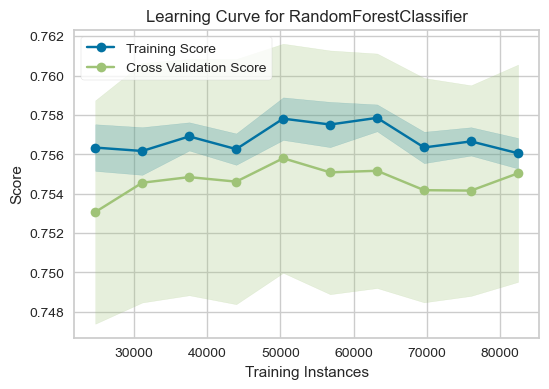

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [84]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Use StratifiedKFold with 12 splits
cv = StratifiedKFold(n_splits=12)

# Define training sizes
sizes = np.linspace(0.3, 1.0, 10)

# Create the LearningCurve visualizer
# Use the best estimator from the GridSearchCV
lc_viz = LearningCurve(
    grid_search_ensemble_one_stan.best_estimator_,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax
)

# Fit the visualizer
lc_viz.fit(X_resampled_one_hot_stan, y_resampled)

# Show the plot
lc_viz.poof()

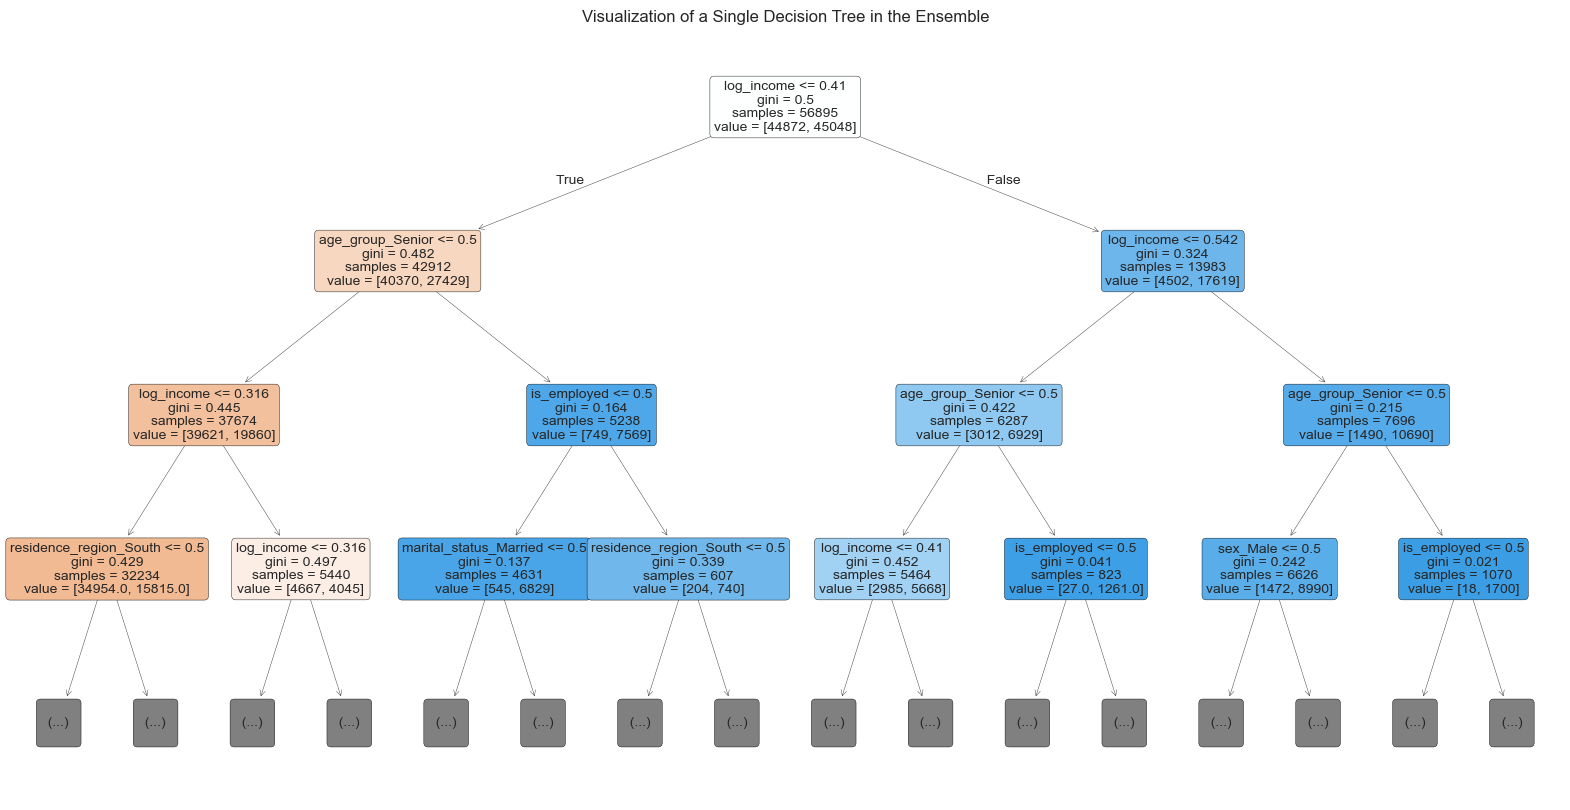

In [85]:
# Extract one tree from the ensemble
single_tree = grid_search_ensemble_one_stan.best_estimator_.estimators_[0]  # Change index to visualize a different tree

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_resampled_one_hot_stan.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Visualization of a Single Decision Tree in the Ensemble")
plt.show()

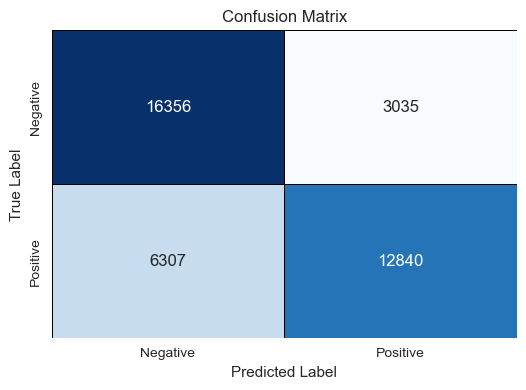


=== Classification Report ===


In [86]:
metrics_df_rf_one_stan, class_report_rf_one_stan = metrics_report(grid_search_ensemble_one_stan, X_val, y_val)

In [87]:
with open('rf_balanced_model_one_hot.pkl', 'wb') as model_file:
    pickle.dump(grid_search_ensemble_one_stan, model_file)

print("Saved in pickle.")

Saved in pickle.


### 5.5: XGBoost <a id="part5.5"></a>

In [88]:

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=2)
grid_search_xgb.fit(X_resampled_one_hot_stan, y_resampled)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

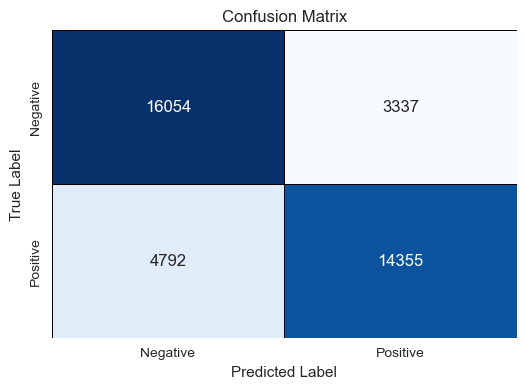


=== Classification Report ===


In [89]:
metrics_df_xg, class_report_xg = metrics_report(grid_search_xgb, X_val, y_val)

In [99]:
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(grid_search_xgb, model_file)

print("Saved in pickle.")

Saved in pickle.


### 5.6: Support Vector Machines <a id="part5.6"></a>

In [ ]:
svm = SVC(probability=True, cache_size=2000, max_iter=5000)


param_dist_svm = {
    'C': [0.1, 1, 10],       
    'kernel': ['linear'],  
    'degree': [2, 3, 4],         
    'gamma': ['scale', 'auto']  
}


random_search_svm_one_stand = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist_svm,  
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    n_iter=10,  
    error_score='raise'
)

# Step 5: Fit com parallel backend e tqdm para progresso
print("Iniciando Random Search...")
with parallel_backend('loky', n_jobs=-1):
    try:
        random_search_svm_one_stand.fit(X_resampled_one_hot_stan, y_resampled)
        print("\nTreino completado com sucesso!")
    except Exception as e:
        print(f"\nErro durante o treino: {str(e)}")

# Step 6: Output results
print("\nResultados:")
print(f"Melhores parâmetros: {random_search_svm_one_stand.best_params_}")
print(f"Melhor F1-score: {random_search_svm_one_stand.best_score_:.2f}")

For the **SVM** model, we had to run it on another computer because it took too long to execute on this one. As a result, the outputs are not shown here.

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Use StratifiedKFold with 12 splits
cv = StratifiedKFold(n_splits=12)

# Define training sizes
sizes = np.linspace(0.3, 1.0, 10)

# Create the LearningCurve visualizer
# Use the best estimator from the GridSearchCV
lc_viz = LearningCurve(
    random_search_svm_one_stand.best_estimator_,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax
)

# Fit the visualizer
lc_viz.fit(X_resampled_one_hot_stan, y_resampled)
ax.grid(linestyle='--')
# Show the plot
lc_viz.poof()

In [ ]:
metrics_svm_rf_one_stan, class_report_svm_one_stan = metrics_report(random_search_svm_one_stand, X_val, y_val)

![SVM_trained](110m_cultural/svm.png)

### 5.7: Neural Network - MLP<a id="part5.7"></a>

This code implements a binary classification neural network with an emphasis on F1-Score optimization. The approach includes hyperparameter tuning, cross-validation, and the use of a custom callback to monitor performance.

Key Components:
- Custom F1-Score Callback:

Monitors the F1-Score on the validation set and implements early stopping based on improvements.
Model Creation:

A modular function builds dense neural networks with configurable layers, neurons, activation functions, and regularization techniques like Batch Normalization and Dropout.
- Hyperparameter Search:

Uses Stratified K-Fold Cross-Validation to evaluate different configurations (activation, dropout rate, learning rate).
The best configuration is selected based on the mean F1-Score across folds.
- Final Model Training:

Trains the final model using the best hyperparameters and incorporates the F1-Score callback for monitoring.

In [90]:

class F1ScoreCallback(callbacks.Callback):
    def __init__(self, X_val, y_val, patience=5):
        super(F1ScoreCallback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.patience = patience
        self.best_weights = None
        self.best_f1 = -np.inf
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val) > 0.5).astype("int32")
        f1 = f1_score(self.y_val, y_pred)
        
        if f1 > self.best_f1:
            self.best_f1 = f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)

def create_model(input_dim, n_hidden_layers=2, 
                 n_neurons=32, 
                 activation='relu',  
                 dropout_rate=0.3, 
                 learning_rate=1e-3):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    
    for _ in range(n_hidden_layers):
        model.add(layers.Dense(n_neurons, activation=activation))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    opt = optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def hyperparameter_search(X_train, y_train, best_features=None):
    # If best_features is provided, select those features
    if best_features is not None:
        X_train = X_train[best_features]
    
    # Ensure numeric dtype
    X_train = X_train.astype(float)
    y_train = y_train.astype(float)

    # Hyperparameter search grid with new configurations
    hyperparams_grid = [
        {'n_hidden_layers': 2, 'n_neurons': 32, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 1e-3},
        {'n_hidden_layers': 2, 'n_neurons': 32,'activation': 'relu', 'dropout_rate': 0.3, 'learning_rate': 5e-4},
        {'n_hidden_layers': 2, 'n_neurons': 32,'activation': 'elu', 'dropout_rate': 0.2, 'learning_rate': 1e-3},
        {'n_hidden_layers': 2, 'n_neurons': 32,'activation': 'tanh', 'dropout_rate': 0.2, 'learning_rate': 1e-4},
        {'n_hidden_layers': 2, 'n_neurons': 32,'activation': 'leaky_relu', 'dropout_rate': 0.3, 'learning_rate': 2e-3},
        {'n_hidden_layers': 2, 'n_neurons': 32,'activation': 'relu', 'dropout_rate': 0.4, 'learning_rate': 1e-4},
    ]

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    best_config = None
    best_mean_f1 = -np.inf

    for config in hyperparams_grid:
        all_f1_scores = []
        all_precision = []
        all_recall = []
        all_accuracy = []
        
        for train_index, val_index in skf.split(X_train, y_train):
            X_cv_train, X_cv_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
            
            # Ensure numeric arrays
            X_cv_train_values = X_cv_train.values.astype(float)
            X_cv_val_values = X_cv_val.values.astype(float)
            y_cv_train_values = y_cv_train.values.astype(float)
            y_cv_val_values = y_cv_val.values.astype(float)
            
            model = create_model(input_dim=X_train.shape[1],
                                 n_hidden_layers=config['n_hidden_layers'],
                                 n_neurons=config['n_neurons'],
                                 activation=config['activation'], 
                                 dropout_rate=config['dropout_rate'],
                                 learning_rate=config['learning_rate'])
            
            # Early stopping based on F1 Score
            f1_callback = F1ScoreCallback(X_cv_val_values, y_cv_val_values, patience=5)
            
            # Fit model
            model.fit(X_cv_train_values, y_cv_train_values, 
                      validation_data=(X_cv_val_values, y_cv_val_values),
                      epochs=50, 
                      batch_size=256, 
                      verbose=0,
                      callbacks=[f1_callback])
            
            # Evaluate on validation set
            y_pred = (model.predict(X_cv_val_values) > 0.5).astype('int32')
            
            fold_f1 = f1_score(y_cv_val_values, y_pred)
            fold_precision = precision_score(y_cv_val_values, y_pred)
            fold_recall = recall_score(y_cv_val_values, y_pred)
            fold_acc = accuracy_score(y_cv_val_values, y_pred)
            
            all_f1_scores.append(fold_f1)
            all_precision.append(fold_precision)
            all_recall.append(fold_recall)
            all_accuracy.append(fold_acc)
        
        mean_f1 = np.mean(all_f1_scores)
        if mean_f1 > best_mean_f1:
            best_mean_f1 = mean_f1
            best_config = {
                'config': config,
                'f1': mean_f1,
                'precision': np.mean(all_precision),
                'recall': np.mean(all_recall),
                'accuracy': np.mean(all_accuracy)
            }

    return best_config

def train_final_model(X_train, y_train, X_val, y_val, best_features=None, best_config=None):
    # If best_config is a dictionary with config details, use best_features from the first run
    if best_config and 'config' in best_config:
        # No changes needed to best_features
        pass
    
    # Prepare data
    if best_features is not None:
        X_train = X_train[best_features]
        X_val = X_val[best_features]
    
    # Ensure numeric dtype
    X_train = X_train.astype(float)
    y_train = y_train.astype(float)
    X_val = X_val.astype(float)
    y_val = y_val.astype(float)
    
    # If no best_config provided, run hyperparameter search
    if best_config is None:
        best_config = hyperparameter_search(X_train, y_train, best_features)
    
    print("Best configuration found:")
    print(best_config)
    
    # Create final model with best configuration
    final_model = create_model(input_dim=X_train.shape[1],
                               n_hidden_layers=best_config['config']['n_hidden_layers'],
                               n_neurons=best_config['config']['n_neurons'],
                               dropout_rate=best_config['config']['dropout_rate'],
                               learning_rate=best_config['config']['learning_rate'])
    
    # Prepare validation data
    X_val_values = X_val.values.astype(float)
    y_val_values = y_val.values.astype(float)
    X_train_values = X_train.values.astype(float)
    y_train_values = y_train.values.astype(float)
    
    # Early stopping callback
    f1_callback_final = F1ScoreCallback(X_val_values, y_val_values, patience=5)
    
    # Train final model
    history = final_model.fit(X_train_values, y_train_values, 
                               validation_data=(X_val_values, y_val_values),
                               epochs=50, 
                               batch_size=256, 
                               verbose=1,
                               callbacks=[f1_callback_final])
    
    return final_model, best_config, history


#best_params = hyperparameter_search(X_resampled_one_hot_stan, y_resampled)

After finding the best network, we train the network with this configuration:
**'n_hidden_layers'**: 2, **'n_neurons'**: 32, **'activation'**: 'relu', **'dropout_rate'**: 0.1, **'learning_rate'**: 0.001

In [91]:
def train_final_model(X_train, y_train, X_val, y_val, best_features=None, best_config=None):
    # If best_config is a dictionary with config details, use best_features from the first run
    if best_config and 'config' in best_config:
        # No changes needed to best_features
        pass
    
    # Prepare data
    if best_features is not None:
        X_train = X_train[best_features]
        X_val = X_val[best_features]
    
    # Ensure numeric dtype
    X_train = X_train.astype(float)
    y_train = y_train.astype(float)
    X_val = X_val.astype(float)
    y_val = y_val.astype(float)
    
    # If no best_config provided, run hyperparameter search
    if best_config is None:
        best_config = hyperparameter_search(X_train, y_train, best_features)
    
    print("Best configuration found:")
    print(best_config)
    
    # Create final model with best configuration
    final_model = create_model(input_dim=X_train.shape[1],
                               n_hidden_layers=best_config['config']['n_hidden_layers'],
                               n_neurons=best_config['config']['n_neurons'],
                               dropout_rate=best_config['config']['dropout_rate'],
                               learning_rate=best_config['config']['learning_rate'])
    
    # Prepare validation data
    X_val_values = X_val.values.astype(float)
    y_val_values = y_val.values.astype(float)
    X_train_values = X_train.values.astype(float)
    y_train_values = y_train.values.astype(float)
    
    # Early stopping callback
    f1_callback_final = F1ScoreCallback(X_val_values, y_val_values, patience=10)
    
    # Train final model
    history = final_model.fit(X_train_values, y_train_values, 
                               validation_data=(X_val_values, y_val_values),
                               epochs=50, 
                               batch_size=256, 
                               verbose=1,
                               callbacks=[f1_callback_final])
    
    return final_model, best_config, history

We have created a new function to obtain the metric scores because it has to be different from the other models.

In [93]:
def metrics_report_nn(model, X_test, y_test, threshold=0.5):
    """
    Generate a detailed metrics report for a Keras Neural Network model and test set.
    
    Parameters:
    - model: The trained Keras model.
    - X_test: Test feature set.
    - y_test: True labels for the test set.
    - threshold: Threshold for binary classification. Default is 0.5.
    
    Returns:
    - metrics_df: DataFrame with evaluation metrics.
    - class_report_df: DataFrame with the classification report.
    """
    # Predict probabilities
    test_pred_proba = model.predict(X_test, verbose=0)
    
    # Apply threshold to get binary predictions
    test_pred = (test_pred_proba > threshold).astype(int).flatten()
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    print(f'f1: {f1}')
    roc_auc = roc_auc_score(y_test, test_pred_proba) if test_pred_proba is not None else None
    conf_matrix = confusion_matrix(y_test, test_pred)
    
    # Create metrics DataFrame
    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
        'Score': [accuracy, precision, recall, f1, roc_auc or 'N/A']
    }
    metrics_df = pd.DataFrame(metrics)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"],
                linewidths=0.5, linecolor='black')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification report
    class_report = classification_report(y_test, test_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()

    print("\n=== Classification Report ===")
    display(
        class_report_df.style.format(precision=3).set_properties(**{
            'font-size': '14px', 'text-align': 'center'
        }).set_table_styles([{
            'selector': 'th',
            'props': [('font-size', '15px'), ('text-align', 'center')]
        }])
    )
    
    return metrics_df, class_report_df

In [94]:
final_model, best_config, history = train_final_model(X_resampled_one_hot_stan, y_resampled, X_val, y_val, best_features=None, best_config={'config': {'n_hidden_layers': 2, 'n_neurons': 32, 
                                                                                                                                                       'activation': 'relu', 'dropout_rate': 0.1, 
                                                                                                                                                       'learning_rate': 0.001}, 'f1': np.float64(0.7558504322965547), 
                                                                                                                                                       'precision': np.float64(0.8029615929881159), 'recall': np.float64(0.7141209061235347), 
                                                                                                                                                       'accuracy': np.float64(0.7686276690391459)})

Best configuration found:
{'config': {'n_hidden_layers': 2, 'n_neurons': 32, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001}, 'f1': 0.7558504322965547, 'precision': 0.8029615929881159, 'recall': 0.7141209061235347, 'accuracy': 0.7686276690391459}
Epoch 1/50
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step 
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6506 - loss: 0.6500 - val_accuracy: 0.7437 - val_loss: 0.5253
Epoch 2/50
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/stepcc
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7365 - loss: 0.5201 - val_accuracy: 0.7485 - val_loss: 0.5026
Epoch 3/50
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7397 - loss: 0.5149 - val_accuracy: 0.7504 - val_loss: 0.5009
Epoch 4/50
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/stepcc
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7423 - loss: 0.5121 - val_accuracy: 0.7490 - val_loss: 0.5010
Epoch 5/50
1205/1205 ━━━━━━━━━━━━━━━━

f1: 0.7280775954435234


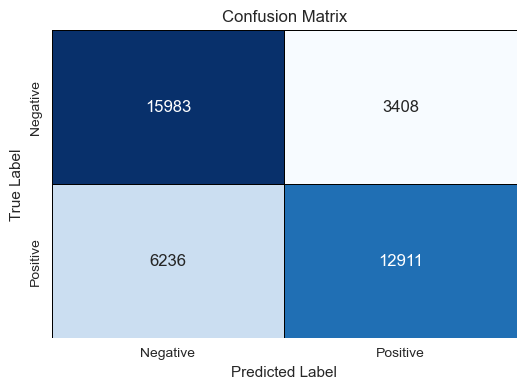


=== Classification Report ===


In [96]:
metrics_df_nn_one_stan, class_report_nn_one_stan = metrics_report_nn(final_model, X_val, y_val)

We tried a lot of configurations, and the best is below:

|                | Precision | Recall | F1-Score | Support    |
|----------------|-----------|--------|----------|------------|
| **False**      | 0.760     | 0.834  | 0.795    | 12915.000  |
| **True**       | 0.814     | 0.734  | 0.772    | 12777.000  |
| **Accuracy**   | 0.784     | 0.784  | 0.784    | 0.784      |
| **Macro Avg**  | 0.787     | 0.784  | 0.784    | 25692.000  |
| **Weighted Avg** | 0.787     | 0.784  | 0.784    | 25692.000  |

This was the best result but it was not the best score in Kaggle.

### 5.8: Meta Model<a id="part5.7"></a>

To test a meta-model, we leveraged the two best pre-trained neural network models. These models were combined to create a meta-model that uses the predictions of the individual models as input features.

In [256]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Input

model1 = load_model('final_model_pro_pro_last.h5')
model2 = load_model('model_2.h5')


def generate_meta_features(models, X):
    meta_features = [model.predict(X) for model in models]
    return np.hstack(meta_features)


meta_train_features = generate_meta_features([model1, model2], X_resampled_one_hot_stan)
meta_test_features = generate_meta_features([model1, model2], X_val)

meta_model = Sequential([
    Input(shape=(meta_train_features.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = meta_model.fit(meta_train_features, y_resampled, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=32, 
                         verbose=1)


meta_model.save('meta_model.h5')

2810/2810 ━━━━━━━━━━━━━━━━━━━━ 2s 576us/step
2810/2810 ━━━━━━━━━━━━━━━━━━━━ 2s 558us/step
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step
Epoch 1/10
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7467 - loss: 0.5115 - val_accuracy: 0.7709 - val_loss: 0.4817
Epoch 2/10
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7751 - loss: 0.4759 - val_accuracy: 0.7708 - val_loss: 0.4806
Epoch 3/10
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7726 - loss: 0.4776 - val_accuracy: 0.7673 - val_loss: 0.4819
Epoch 4/10
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7726 - loss: 0.4765 - val_accuracy: 0.7699 - val_loss: 0.4783
Epoch 5/10
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7739 - loss: 0.4723 - val_accuracy: 0.7710 - val_loss: 0.4777
Epoch 6/10
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7761 - loss: 0.4725 - val_accuracy: 0.7700 - val_loss: 0.4776
Epoch 7/10
2248/2248 ━━━━━━━━━━━━━━━━━━━

In [259]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

def evaluate_meta_model(meta_model, X_test_features, y_test, threshold=0.5):
    """
    Avalia o meta-modelo com métricas de Accuracy, F1-Score e Classification Report.

    Parâmetros:
    - meta_model: O meta-modelo treinado (Keras Model).
    - X_test_features: Features de teste geradas pelos modelos base.
    - y_test: Labels reais (ground truth) do conjunto de teste.
    - threshold: Limite para converter as probabilidades em classes binárias (default: 0.5).
    
    Retorna:
    - Um dicionário com Accuracy, F1-Score e Classification Report.
    """

    y_pred_probs = meta_model.predict(X_test_features)
    
    y_pred = (y_pred_probs > threshold).astype(int)
    
    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')  
    report = classification_report(y_test, y_pred, output_dict=False)
    
    # Exibir resultados
    print("=== Meta-Model Evaluation ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(report)

    return {
        'accuracy': acc,
        'f1_score': f1,
        'classification_report': report
    }

In [290]:

evaluation_results = evaluate_meta_model(meta_model, meta_test_features, y_val)

accuracy = evaluation_results['accuracy']
f1_score_value = evaluation_results['f1_score']

classification_report_text = evaluation_results['classification_report']

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step
=== Meta-Model Evaluation ===
Accuracy: 0.7714
F1-Score: 0.7603

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.81      0.78     19391
        True       0.79      0.73      0.76     19147

    accuracy                           0.77     38538
   macro avg       0.77      0.77      0.77     38538
weighted avg       0.77      0.77      0.77     38538



However, the performance of the meta-model was worse compared to the individual models.

##  **Part 6**: Test Kaggle<a id="part6"></a>

In [ ]:
#with open('dt_balanced_model_one_hot.pkl', 'rb') as file:
#    dt_model = pickle.load(file)

# Carregar o modelo salvo
final_model = load_model('nn_one.h5')

data = pd.read_csv('customer_test_masked.csv')
ids = data["custid"]
data.drop(columns= ['Unnamed: 0', 'code_column', 'health_ins', 'custid'], inplace= True)


data['is_employed']= data['is_employed'].fillna(False)
data['is_employed']= data['is_employed'].astype(bool)
data['income'] = data['income'].apply(lambda x: max(x, 0))
data['log_income'] = np.log1p(data['income'])
data['recent_move_b']= data['recent_move_b'].replace({'F': False, 'T': True})
data['recent_move_b']= data['recent_move_b'].astype(bool)
data['num_vehicles'].astype('Int64')

def categorize_age(age):
    if age < 40:
        return 'Young'
    elif 40 <= age < 65:
        return 'Middle-aged'
    else:
        return 'Senior'

data['age_group'] = data['age'].apply(categorize_age)


data['income'] = data['income'].apply(lambda x: max(x, 0))
data['log_income'] = np.log1p(data['income'])


def assign_region(state):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
                 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
    midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri',
               'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
    south = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
             'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina',
             'Tennessee', 'Texas', 'Virginia', 'West Virginia', 'Washington D.C.', 'District of Columbia']
    west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana',
            'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']

    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

data['residence_region'] = data['state_of_res'].apply(assign_region)


numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
data = pd.get_dummies(data, columns=['sex', 'marital_status', 'housing_type', 'residence_region', 'age_group'], drop_first=True)

scaler = StandardScaler()
variables_to_standardize = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms', 'log_income']
data[variables_to_standardize] = scaler.fit_transform(data[variables_to_standardize])


columns_to_drop = ["income", "state_of_res"]
data = data.drop(columns=columns_to_drop)

data['recent_move_b']= data['recent_move_b'].replace({'F': False, 'T': True})
data['recent_move_b']= data['recent_move_b'].astype(bool)



In [70]:
data.isna().sum()

is_employed                                   0
num_vehicles                                 34
age                                           0
gas_usage                                    34
rooms                                         0
recent_move_b                                 0
log_income                                    0
sex_Male                                      0
marital_status_Married                        0
marital_status_Never married                  0
marital_status_Widowed                        0
housing_type_Homeowner with mortgage/loan     0
housing_type_Occupied with no rent            0
housing_type_Rented                           0
residence_region_Northeast                    0
residence_region_South                        0
residence_region_West                         0
age_group_Senior                              0
age_group_Young                               0
dtype: int64

In [ ]:
data['num_vehicles'] = data['num_vehicles'].fillna(0)
mean_value = data['gas_usage'].mean()
data['gas_usage'] = data['gas_usage'].fillna(mean_value)

data = data[best_features]

In [69]:
#predictions = dt_model.predict(data)

#predictions = pd.Series(predictions).map({False: 'FALSE', True: 'TRUE'})

# For NN
predictions = final_model.predict(data)
predictions = predictions.flatten()
predictions_binary = (predictions > 0.5).astype(bool)


predictions_str = np.where(predictions_binary, 'TRUE', 'FALSE')

result = pd.DataFrame({'custid': ids, 'health_ins_prediction': predictions_str})
result.to_csv('predicts_dt.csv', index=False)
result

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


custid health_ins_prediction
0    001115999_01                  TRUE
1    000566299_01                  TRUE
2    001397329_01                  TRUE
3    000843100_01                  TRUE
4    000260071_03                  TRUE
..            ...                   ...
799  000961606_04                 FALSE
800  001063357_01                  TRUE
801  000613999_02                 FALSE
802  000087463_03                 FALSE
803  001080446_02                 FALSE

[804 rows x 2 columns]

##  **Part 7**: Conclusions and Aggregation Table<a id="part7"></a>

In [ ]:

dfs = {
    'KNN Model': class_report_knn_one_stan_DF.T.drop('model', axis= 0),
    'GNB Model': class_report_gnb_one_stan_DF.T.drop('model', axis= 0),
    'BNB Model': class_report_bnb_one_stan_DF.T.drop('model', axis= 0),
    'DT Model': class_report_dt_one_stan_DF.T.drop('model', axis= 0),
    'RF Model': class_report_rf_one_stan_Df.T.drop('model', axis= 0),
    'XG Boost Model': class_report_xg_Df.T.drop('model', axis= 0),
    'Neural Network Model': class_report_nn_one_stan_dict_DF.T.drop('model', axis= 0),
    'Meta Model': classification_report_text_DF.T
}


In [4]:

summary_reports= pd.read_csv('meta_model_AC.csv')
#summary_reports.reset_index(inplace=True)
summary_reports.rename(columns={'index': 'metric'}, inplace=True)
summary_reports.set_index(['model', 'metric'], inplace=True)

summary_reports

precision    recall  f1-score       support
model           metric                                                   
KNN             FALSE          0.851241  0.809757  0.829981  19391.000000
                TRUE           0.816395  0.856688  0.836056  19147.000000
                accuracy       0.833074  0.833074  0.833074      0.833074
                macro avg      0.833818  0.833222  0.833019  38538.000000
                weighted avg   0.833928  0.833074  0.832999  38538.000000
GNB             FALSE          0.695028  0.689186  0.692095  19391.000000
                TRUE           0.687882  0.693738  0.690798  19147.000000
                accuracy       0.691447  0.691447  0.691447      0.691447
                macro avg      0.691455  0.691462  0.691446  38538.000000
                weighted avg   0.691478  0.691447  0.691450  38538.000000
BNB             FALSE          0.680093  0.829818  0.747532  19391.000000
                TRUE           0.778196  0.604690  0.680558  19147.000000
                accuracy       0.717967  0.717967  0.717967      0.717967
                macro avg      0.729144  0.717254  0.714045  38538.000000
                weighted avg   0.728834  0.717967  0.714257  38538.000000
DT              FALSE          0.713122  0.853128  0.776867  19391.000000
                TRUE           0.814342  0.652426  0.724447  19147.000000
                accuracy       0.753412  0.753412  0.753412      0.753412
                macro avg      0.763732  0.752777  0.750657  38538.000000
                weighted avg   0.763411  0.753412  0.750823  38538.000000
RF              FALSE          0.721705  0.843484  0.777857  19391.000000
                TRUE           0.808819  0.670601  0.733253  19147.000000
                accuracy       0.757590  0.757590  0.757590      0.757590
                macro avg      0.765262  0.757043  0.755555  38538.000000
                weighted avg   0.764986  0.757590  0.755696  38538.000000
XG Boost        FALSE          0.770124  0.827910  0.797972  19391.000000
                TRUE           0.811384  0.749726  0.779337  19147.000000
                accuracy       0.789065  0.789065  0.789065      0.789065
                macro avg      0.790754  0.788818  0.788655  38538.000000
                weighted avg   0.790623  0.789065  0.788714  38538.000000
Neural Network  FALSE          0.719339  0.824248  0.768229  19391.000000
                TRUE           0.791164  0.674309  0.728078  19147.000000
                accuracy       0.749753  0.749753  0.749753      0.749753
                macro avg      0.755251  0.749279  0.748153  38538.000000
                weighted avg   0.755024  0.749753  0.748280  38538.000000
Meta            FALSE          0.750000  0.810000  0.780000  19391.000000
                TRUE           0.790000  0.730000  0.760000  19147.000000
                accuracy       0.770000  0.770000  0.770000  38538.000000
                macro avg      0.770000  0.770000  0.770000  38538.000000
                weighted avg   0.770000  0.770000  0.770000  38538.000000
SVM             FALSE          0.702000  0.854000  0.770000  19391.000000
                TRUE           0.811000  0.634000  0.712000  19147.000000
                accuracy       0.744000  0.744000  0.744000      0.744000
                macro avg      0.757000  0.744000  0.741000  38538.000000
                weighted avg   0.756000  0.744000  0.741000  38538.000000

#### **Conclusions:**

##### Summary of Findings:
- **Age** and **income** are the most significant predictors of health insurance ownership.
- The **middle-aged** group and individuals with higher incomes are more likely to have insurance coverage.
##### Best Models:
- Decision Tree and Random Forest delivered the best performance with an **accuracy** and **F1-score** of ~76%.
- The Meta-Model achieved a high **F1-score** of 0.7603, showing strong balance between precision and recall.
##### Impact of SMOTE:
- Addressing class imbalance with **SMOTE** significantly improved model performance.

##### Business Gains from the Data Science Effort
The business can benefit in the following ways:

- **Improved Targeting**: By identifying which customers are likely to adopt health insurance, businesses can optimize their marketing efforts. For example:
    Focusing campaigns on high-potential customer segments based on features like age, income, and housing type.
- **Cost Efficiency**: Reducing marketing costs by avoiding outreach to customers with low probability of purchasing insurance.
- **Customer Insights**: Gaining valuable insights about customer demographics and behaviors influencing insurance adoption.
- **Revenue Growth**: Increasing revenue through precise targeting and converting more customers into health insurance buyers.

##### Lessons Learned

- **Importance of Feature Selection**: Applying methods like RFE and Random Forest ensures the model focuses on the most critical features, improving performance and interpretability​.

- **Dealing with Imbalanced Data**: Addressing class imbalance using SMOTE significantly improved the fairness of predictions​.


##### Future Work:
- Incorporate additional features or datasets.
- Further optimize neural network architectures.
- Explore advanced ensemble methods for improved accuracy.
